# Imports

In [338]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, r2_score, precision_score, recall_score, f1_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from matplotlib.transforms import Bbox
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_approximation import RBFSampler
from matplotlib import rcParams
rcParams['text.usetex'] = True
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

# Preprocesing data

## Reading data

In [339]:
n_bound = 1
data_k = pd.read_excel('kernel_shuffled.xlsx',header=None)
data_b = pd.read_excel('bound_shuffled.xlsx', sheet_name=f'Sheet{n_bound}', header=None)

In [340]:
y_data_k = data_k.get(data_k.shape[1]-1)
X_data_k = data_k.drop(columns=data_k.shape[1]-1)
y_data_b = data_b.get(data_b.shape[1]-1) 
X_data_b = data_b.drop(columns=data_b.shape[1]-1)

## Spliting data

In [341]:
# Kernel train test
X_train_k, X_test_k, y_train_k, y_test_k = train_test_split(X_data_k, y_data_k, test_size=0.2)
# Bound train test
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_data_b, y_data_b, test_size=0.2)

In [342]:
# Kernel + Bound train test
X_train_kb = pd.concat([X_train_k, X_train_b], axis=0)
y_train_kb = pd.concat([y_train_k, y_train_b], axis=0)
y_train_c = np.concatenate([np.zeros(y_train_k.shape), np.ones(y_train_b.shape)], axis=0).astype(int)
X_test_kb = pd.concat([X_test_k, X_test_b], axis=0)
y_test_kb = pd.concat([y_test_k, y_test_b], axis=0)
y_test_c = np.concatenate([np.zeros(y_test_k.shape), np.ones(y_test_b.shape)], axis=0).astype(int)

## Preparing data for classification

In [343]:
X_train = X_train_kb.assign(c=y_train_c, y=y_train_kb)
X_train = X_train.sample(frac=1).reset_index(drop=True)
y_train_class = X_train.get('c')
y_train_kb = X_train.get('y')
X_train_kb = X_train.drop(columns=['y','c'])

In [344]:
X_test = X_test_kb.assign(c=y_test_c, y=y_test_kb)
X_test = X_test.sample(frac=1,axis=0).reset_index(drop=True)
y_test_kb = X_test.get('y')
X_test = X_test.drop(columns='y')
y_test_class = X_test.get('c')
X_test_kb = X_test.drop(columns='c')

In [345]:
std_class = StandardScaler()
X_train_kb_std = std_class.fit_transform(X_train_kb, y_train_class)
X_test_kb_std = std_class.transform(X_test_kb)

(array([800.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 800.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

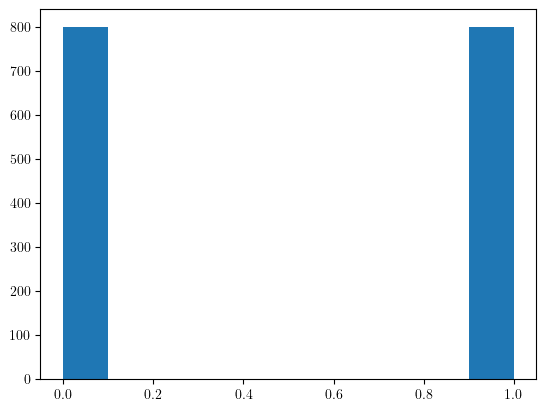

In [346]:
plt.hist(y_train_class)

## Preparing data for regression

In [347]:
std = StandardScaler()
rbf_feature = RBFSampler(n_components=6)
# Kernel --> 
X_train_k_std = std.fit_transform(X_train_k, y_train_k)
X_train_k_std = rbf_feature.fit_transform(X_train_k_std, y_train_k)
# --> Kernel
X_test_k_k_std = std.transform(X_test_k)
X_test_k_k_std = rbf_feature.transform(X_test_k_k_std)
# --> Bound
X_test_k_b_std = std.transform(X_test_b)
X_test_k_b_std = rbf_feature.transform(X_test_k_b_std)

In [348]:
std2 = StandardScaler()
rbf_feature2 = RBFSampler(n_components=6)
# Bound --> 
X_train_b_std = std2.fit_transform(X_train_b, y_train_b)
X_train_b_std = rbf_feature2.fit_transform(X_train_b_std, y_train_b)
# --> Bound
X_test_b_b_std = std2.transform(X_test_b)
X_test_b_b_std = rbf_feature2.transform(X_test_b_b_std)
# --> Kernel
X_test_b_k_std = std2.transform(X_test_k)
X_test_b_k_std = rbf_feature2.transform(X_test_b_k_std)

In [349]:
std3 = StandardScaler()
rbf_feature3 = RBFSampler(n_components=6)
# Kernel + Bound -->
X_train_kb_std = std3.fit_transform(X_train_kb, y_train_kb)
X_train_kb_std = rbf_feature3.fit_transform(X_train_kb_std, y_train_kb)
# --> Kernel
X_test_kb_k_std = std3.transform(X_test_k)
X_test_kb_k_std = rbf_feature3.transform(X_test_kb_k_std)
# --> Bound
X_test_kb_b_std = std3.transform(X_test_b)
X_test_kb_b_std = rbf_feature3.transform(X_test_kb_b_std)

In [350]:
y_test_b

171    0.000485
830    0.000508
187    0.000559
331    0.000547
930    0.000666
         ...   
877    0.000595
314    0.000582
843    0.000392
973    0.000530
407    0.000508
Name: 6, Length: 200, dtype: float64

# ML Classification models

Logistic Regression Report
               precision    recall  f1-score   support

           0       0.53      0.59      0.56       200
           1       0.54      0.47      0.50       200

    accuracy                           0.53       400
   macro avg       0.53      0.53      0.53       400
weighted avg       0.53      0.53      0.53       400

0.533015873015873
0.5325
0.5306666666666667
SVM Report
               precision    recall  f1-score   support

           0       0.63      0.17      0.26       200
           1       0.52      0.91      0.66       200

    accuracy                           0.54       400
   macro avg       0.58      0.54      0.46       400
weighted avg       0.58      0.54      0.46       400

0.5773651635720601
0.535
0.4612443517553006

 Decision Tree 
 	 mean precision 	 mean recall 	 	 mean fscore 

0.0 	 0.4654 	 	 0.45 	 	 0.457 

1.0 	 0.4663 	 	 0.482 	 	 0.4735 

	 std precision 	 	 std recall 	 	 std fscore 

0.0 	 0.0109 	 	 0.0243 	 	 0.010

<Figure size 640x480 with 0 Axes>

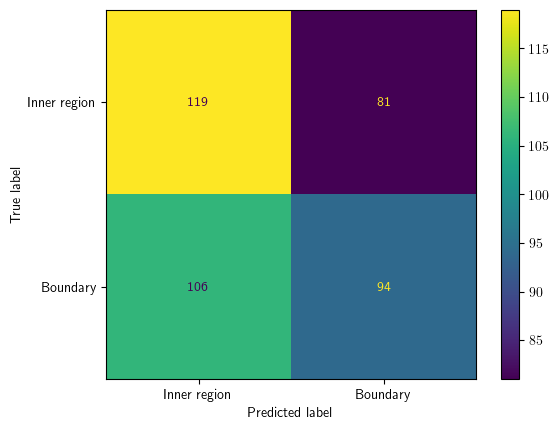

<Figure size 640x480 with 0 Axes>

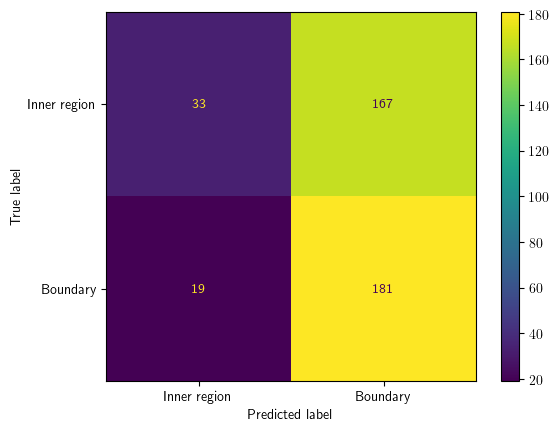

<Figure size 640x480 with 0 Axes>

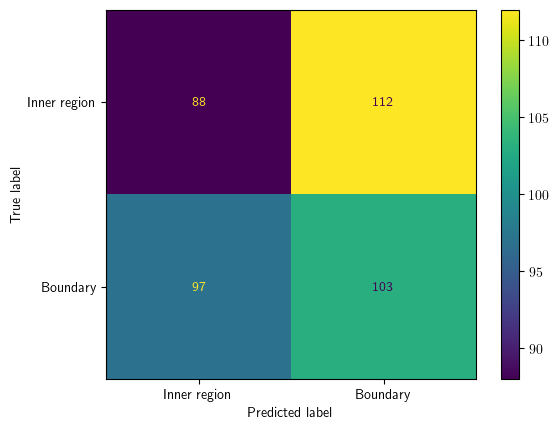

<Figure size 640x480 with 0 Axes>

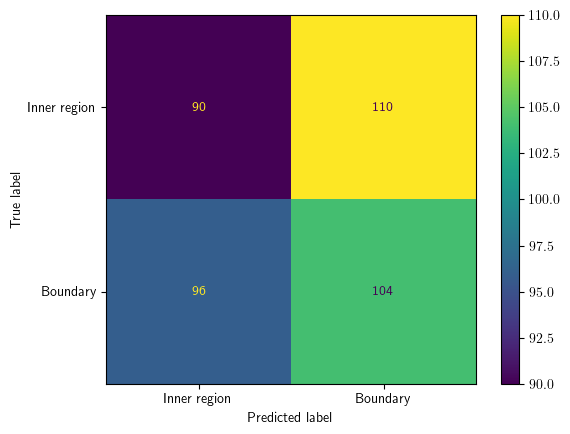

In [351]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support as score

#LR
lr = LogisticRegression()
lr.fit(X_train_kb_std, y_train_class)
y_predict_lr = lr.predict(X_test_kb_std)
print('Logistic Regression Report\n', classification_report(y_test_class, y_predict_lr))
print(precision_score(y_test_class, y_predict_lr, average='weighted'))
print(recall_score(y_test_class, y_predict_lr, average='weighted'))
print(f1_score(y_test_class, y_predict_lr, average='weighted'))

#SVC
svc = SVC()
svc.fit(X_train_kb_std, y_train_class)
y_predict_svc = svc.predict(X_test_kb_std)
print('SVM Report\n', classification_report(y_test_class, y_predict_svc))
print(precision_score(y_test_class, y_predict_svc, average='weighted'))
print(recall_score(y_test_class, y_predict_svc, average='weighted'))
print(f1_score(y_test_class, y_predict_svc, average='weighted'))

#DT
precision_dt = []
recall_dt = []
fscore_dt = []
support_dt = []
precision_score_dt = []
recall_score_dt = []
f1_score_dt = []
for r in range(5):
    dt = DecisionTreeClassifier()
    dt.fit(X_train_kb_std, y_train_class)
    y_predict_dt = dt.predict(X_test_kb_std)
    precision,recall,fscore,support=score(y_test_class, y_predict_dt, average=None)
    precision_dt.append(precision)
    recall_dt.append(recall)
    fscore_dt.append(fscore)
    support_dt.append(support)

    p_s = precision_score(y_test_class, y_predict_dt, average='weighted')
    r_s = recall_score(y_test_class, y_predict_dt, average='weighted')
    f_s = f1_score(y_test_class, y_predict_dt, average='weighted')

    precision_score_dt.append(p_s)
    recall_score_dt.append(r_s)
    f1_score_dt.append(f_s)

precision_dt = np.array(precision_dt)
mean_precision_dt = np.mean(precision_dt, axis=0)
std_precision_dt = np.std(precision_dt, axis=0)

recall_dt = np.array(recall_dt)
mean_recall_dt = np.mean(recall_dt, axis=0)
std_recall_dt = np.std(recall_dt, axis=0)

fscore_dt = np.array(fscore_dt)
mean_fscore_dt = np.mean(fscore_dt, axis=0)
std_fscore_dt = np.std(fscore_dt, axis=0)

support_dt = np.array(support_dt)
mean_support_dt = np.mean(support_dt, axis=0)
std_support_dt = np.std(support_dt, axis=0)

print('\n','Decision Tree', '\n', '\t', 'mean precision', '\t', 'mean recall', '\t \t', 'mean fscore','\n')
print('0.0', '\t', round(mean_precision_dt[0], 4), '\t \t', round(mean_recall_dt[0], 4), '\t \t', round(mean_fscore_dt[0], 4), '\n')
print('1.0', '\t', round(mean_precision_dt[1], 4), '\t \t', round(mean_recall_dt[1], 4), '\t \t', round(mean_fscore_dt[1], 4), '\n')
print('\t', 'std precision', '\t \t', 'std recall', '\t \t', 'std fscore','\n')
print('0.0','\t', round(std_precision_dt[0], 4), '\t \t', round(std_recall_dt[0], 4), '\t \t', round(std_fscore_dt[0], 4), '\n')
print('1.0','\t', round(std_precision_dt[1], 4), '\t \t', round(std_recall_dt[1], 4), '\t \t', round(std_fscore_dt[1], 4), '\n')

print(np.mean(precision_score_dt))
print(np.mean(recall_score_dt))
print(np.mean(f1_score_dt))
#------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------

#RF
precision_rf = []
recall_rf = []
fscore_rf = []
support_rf = []
precision_score_rf = []
recall_score_rf = []
f1_score_rf = []
for r in range(5):
    rf = RandomForestClassifier()
    rf.fit(X_train_kb_std, y_train_class)
    y_predict_rf = rf.predict(X_test_kb_std)
    precision,recall,fscore,support=score(y_test_class, y_predict_dt, average=None)
    precision_rf.append(precision)
    recall_rf.append(recall)
    fscore_rf.append(fscore)
    support_rf.append(support)

    p_s = precision_score(y_test_class, y_predict_rf, average='weighted')
    r_s = recall_score(y_test_class, y_predict_rf, average='weighted')
    f_s = f1_score(y_test_class, y_predict_rf, average='weighted')

    precision_score_rf.append(p_s)
    recall_score_rf.append(r_s)
    f1_score_rf.append(f_s)

precision_rf = np.array(precision_rf)
mean_precision_rf = np.mean(precision_rf, axis=0)
std_precision_rf = np.std(precision_rf, axis=0)

recall_rf = np.array(recall_rf)
mean_recall_rf = np.mean(recall_rf, axis=0)
std_recall_rf= np.std(recall_rf, axis=0)

fscore_rf = np.array(fscore_rf)
mean_fscore_rf = np.mean(fscore_rf, axis=0)
std_fscore_rf = np.std(fscore_rf, axis=0)


support_rf = np.array(support_rf)
mean_support_rf = np.mean(support_rf, axis=0)
std_support_rf = np.std(support_rf, axis=0)

print('\n','Random Forest', '\n', '\t', 'mean precision', '\t', 'mean recall', '\t \t', 'mean fscore','\n')
print('0.0', '\t', round(mean_precision_rf[0], 4), '\t \t', round(mean_recall_rf[0], 4), '\t \t', round(mean_fscore_rf[0], 4), '\n')
print('1.0', '\t', round(mean_precision_rf[1], 4), '\t \t', round(mean_recall_rf[1], 4), '\t \t', round(mean_fscore_rf[1], 4), '\n')
print('\t', 'std precision', '\t \t', 'std recall', '\t \t', 'std fscore','\n')
print('0.0','\t', round(std_precision_rf[0], 4), '\t \t \t', round(std_recall_rf[0], 4), '\t \t \t', round(std_fscore_rf[0], 4), '\n')
print('1.0','\t', round(std_precision_rf[1], 4), '\t \t \t', round(std_recall_rf[1], 4), '\t \t \t', round(std_fscore_rf[1], 4), '\n')

print(np.mean(precision_score_rf))
print(np.mean(recall_score_rf))
print(np.mean(f1_score_rf))

ppres_lr = precision_score(y_test_class, y_predict_lr, average='weighted')
prec_lr = recall_score(y_test_class, y_predict_lr, average='weighted')
pf1_lr = f1_score(y_test_class, y_predict_lr, average='weighted')

ppres_svc = precision_score(y_test_class, y_predict_svc, average='weighted')
prec_svc = recall_score(y_test_class, y_predict_svc, average='weighted')
pf1_svc = f1_score(y_test_class, y_predict_svc, average='weighted')

print(f'LogR & {round(ppres_lr,5)} & {round(prec_lr,5)} & {round(pf1_lr,5)} \\\\')
print(f'SVC & {round(ppres_svc,5)} & {round(prec_svc,5)} & {round(pf1_svc,5)} \\\\')
print(f'DT$_5$ & {round(np.mean(precision_score_dt),5)} & {round(np.mean(recall_score_dt),5)} & {round(np.mean(f1_score_dt),5)} \\\\')
print(f'RF$_5$ & {round(np.mean(precision_score_rf),5)} & {round(np.mean(recall_score_rf),5)} & {round(np.mean(f1_score_rf),5)} \\\\')


fig1 = plt.figure()
metrics.ConfusionMatrixDisplay.from_predictions(y_test_class, y_predict_lr,display_labels=["Inner region", "Boundary"])
plt.savefig('./figures/monte-carlo-sampling-confusion_matrix_lr.eps')
plt.show()

fig2 = plt.figure()
metrics.ConfusionMatrixDisplay.from_predictions(y_test_class, y_predict_svc,display_labels=["Inner region", "Boundary"])
plt.savefig('./figures/monte-carlo-sampling-confusion_matrix_svc.eps')
plt.show()

fig3 = plt.figure()
metrics.ConfusionMatrixDisplay.from_predictions(y_test_class, y_predict_dt,display_labels=["Inner region", "Boundary"])
plt.savefig('./figures/monte-carlo-sampling-confusion_matrix_dt.eps')
plt.show()

fig4 = plt.figure()
metrics.ConfusionMatrixDisplay.from_predictions(y_test_class, y_predict_rf,display_labels=["Inner region", "Boundary"])
plt.savefig('./figures/monte-carlo-sampling-confusion_matrix_rf.eps')
plt.show()

# Regression problem

## Testing the Kernel

### Kernel --> Kernel

In [352]:
#Kernel data
#Train data', rmse_svr, '\n', 'DT: ''\t', rmse_dt, '\n', 'RF: ''\t', rmse_rf, '\n', )
#data_k_train = pd.read_excel('train_kernel_bound_forKernel.xlsx') #this data contains samples from kernel (80%) and whole bound
#X_train_k = data_k_train.values[:, :-1]
#y_train_k = data_k_train.values[:, -1]
#Test data
#data_k_test = pd.read_excel('test_kernel.xlsx')
#X_test_k = data_k_test.values[:, :-1]
#y_test_k = data_k_test.values[:, -1]

#### Regression models

In [353]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import metrics

mlp = MLPRegressor(learning_rate='constant', activation='logistic', alpha= 0.05, hidden_layer_sizes= (50, 100, 50), solver= 'adam')
mlp.fit(X_train_k_std, y_train_k)
y_predict_mlp_k = mlp.predict(X_test_k_k_std)

# mlp = MLPRegressor()
# param_grid = {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
#          'activation': ['relu','tanh','logistic'],
#          'alpha': [0.0001, 0.05, 0.1],
#          'learning_rate': ['constant','adaptive'],
#          'solver': ['adam','sgd']}

# gsc = GridSearchCV(mlp,param_grid,cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

# grid_result = gsc.fit(X_train_k_std, y_train_k)

# print(grid_result.best_params_)

# y_predict_mlp_k = gsc.predict(X_test_k_k_std)


lr = LinearRegression()
lr.fit(X_train_k_std, y_train_k)
y_predict_lr_k = lr.predict(X_test_k_k_std)
# plt.scatter(np.arange(len(y_test_k)), y_predict_lr_k, linewidth=5)
# plt.plot(y_predict_lr_k)

svr = SVR()
svr.fit(X_train_k_std, y_train_k)
y_predict_svr_k = svr.predict(X_test_k_k_std)
# plt.plot(y_predict_svr_k)

mae_dt = []
rmse_dt = []
r2_dt = []
mape_dt = []
for r in range(5):
    dt = DecisionTreeRegressor()
    dt.fit(X_train_k_std, y_train_k)
    y_predict_dt_k = dt.predict(X_test_k_k_std)
    #mae = metrics.mean_absolute_error(y_test, y_predict_dt)
    #mse = metrics.mean_squared_error(y_test, y_predict_dt)
    mae = metrics.mean_absolute_error(y_test_k, y_predict_dt_k)
    rmse = np.sqrt(metrics.mean_squared_error(y_test_k, y_predict_dt_k))
    r2 = r2_score(y_test_k, y_predict_dt_k)
    mape = mean_absolute_percentage_error(y_test_k, y_predict_dt_k)
    mae_dt.append(mae)
    rmse_dt.append(rmse)
    r2_dt.append(r2)
    mape_dt.append(mape)
    # plt.plot(y_test_k)
    # plt.plot(y_predict_dt_k)

mae_rf = []
rmse_rf = []
r2_rf = []
mape_rf = []
for r in range(5):
    rf = RandomForestRegressor()
    rf.fit(X_train_k_std, y_train_k)
    y_predict_rf_k = rf.predict(X_test_k_k_std)
    #mae = metrics.mean_absolute_error(y_test, y_predict_rf)
    #mse = metrics.mean_squared_error(y_test, y_predict_rf)
    mae = metrics.mean_absolute_error(y_test_k, y_predict_rf_k)
    rmse = np.sqrt(metrics.mean_squared_error(y_test_k, y_predict_rf_k))
    r2 = r2_score(y_test_k, y_predict_rf_k)
    mape = mean_absolute_percentage_error(y_test_k, y_predict_rf_k)
    mae_rf.append(mae)
    rmse_rf.append(rmse)
    r2_rf.append(r2)
    mape_rf.append(mape)
    # plt.plot(y_test_k)
    # plt.scatter(np.arange(len(y_test_k)), y_predict_rf_k, linewidth=5)


rmse_lr = np.sqrt(metrics.mean_squared_error(y_test_k, y_predict_lr_k))
rmse_mlp = np.sqrt(metrics.mean_squared_error(y_test_k, y_predict_mlp_k))
rmse_svr = np.sqrt(metrics.mean_squared_error(y_test_k, y_predict_svr_k))
rmse_dt = np.mean(rmse_dt)
rmse_rf = np.mean(rmse_rf)
mae_lr = metrics.mean_absolute_error(y_test_k, y_predict_lr_k)
mae_mlp = metrics.mean_absolute_error(y_test_k, y_predict_mlp_k)
mae_svr = metrics.mean_absolute_error(y_test_k, y_predict_svr_k)
mae_dt = np.mean(mae_dt)
mae_rf = np.mean(mae_rf)
r2_lr = r2_score(y_test_k, y_predict_lr_k)
r2_mlp = r2_score(y_test_k, y_predict_mlp_k)
r2_svr = r2_score(y_test_k, y_predict_svr_k)
r2_dt = np.mean(r2_dt)
r2_rf = np.mean(r2_rf)
mape_lr = mean_absolute_percentage_error(y_test_k, y_predict_lr_k)
mape_mlp = mean_absolute_percentage_error(y_test_k, y_predict_mlp_k)
mape_svr = mean_absolute_percentage_error(y_test_k, y_predict_svr_k)
mape_dt = np.mean(mape_dt)
mape_rf = np.mean(mape_rf)

print('Root Mean Squared Error:''\n', 'LR: ''\t', rmse_lr, '\n', 'MLP: ''\t', rmse_mlp, '\n', 'SVR: ''\t', rmse_svr, '\n', 'DT: ''\t', rmse_dt, '\n', 'RF: ''\t', rmse_rf, '\n', )
print('Mean Absolute Error:''\n', 'LR: ''\t', mae_lr, '\n', 'MLP: ''\t', mae_mlp, '\n', 'SVR: ''\t', mae_svr, '\n', 'DT: ''\t', mae_dt, '\n', 'RF: ''\t', mae_rf, '\n', )
print('R2 Score:''\n', 'LR: ''\t', r2_lr, '\n', 'MLP: ''\t', r2_mlp, '\n', 'SVR: ''\t', r2_svr, '\n', 'DT: ''\t', r2_dt, '\n', 'RF: ''\t', r2_rf, '\n', )
print('MAPE Score:''\n', 'LR: ''\t', mape_lr, '\n', 'MLP: ''\t', mape_mlp, '\n', 'SVR: ''\t', mape_svr, '\n', 'DT: ''\t', mape_dt, '\n', 'RF: ''\t', mape_rf, '\n', )

print(f'LR & {round(rmse_lr,5)} & {round(mae_lr,5)} & {round(r2_lr,5)} & {round(mape_lr,5)} \\\\')
print(f'SVR & {round(rmse_svr,5)} & {round(mae_svr,5)} & {round(r2_svr,5)} & {round(mape_svr,5)} \\\\')
print(f'DT$_5$ & {round(rmse_dt,5)} & {round(mae_dt,5)} & {round(r2_dt,5)} & {round(mape_dt,5)} \\\\')
print(f'RF$_5$ & {round(rmse_rf,5)} & {round(mae_rf,5)} & {round(r2_rf,5)} & {round(mape_rf,5)} \\\\')
print(f'MLP & {round(rmse_mlp,5)} & {round(mae_mlp,5)} & {round(r2_mlp,5)} & {round(mape_mlp,5)} \\\\')

Root Mean Squared Error:
 LR: 	 0.00020505499790943323 
 MLP: 	 0.0003834722715991456 
 SVR: 	 0.000209694434142382 
 DT: 	 0.0003112395090792849 
 RF: 	 0.00021179346470578427 

Mean Absolute Error:
 LR: 	 0.0001656908792566706 
 MLP: 	 0.0003187981501527438 
 SVR: 	 0.00017226662056106005 
 DT: 	 0.00025430073621652774 
 RF: 	 0.00017067857736665937 

R2 Score:
 LR: 	 0.0418713106913049 
 MLP: 	 -2.35081968918082 
 SVR: 	 -0.0019751089751227635 
 DT: 	 -1.2077063091802578 
 RF: 	 -0.022139849687528513 

MAPE Score:
 LR: 	 0.10287900516483502 
 MLP: 	 0.20818162313975516 
 SVR: 	 0.10661921082264639 
 DT: 	 0.15393554373896237 
 RF: 	 0.10509977896967929 

LR & 0.00021 & 0.00017 & 0.04187 & 0.10288 \\
SVR & 0.00021 & 0.00017 & -0.00198 & 0.10662 \\
DT$_5$ & 0.00031 & 0.00025 & -1.20771 & 0.15394 \\
RF$_5$ & 0.00021 & 0.00017 & -0.02214 & 0.1051 \\
MLP & 0.00038 & 0.00032 & -2.35082 & 0.20818 \\


### ML vs True comparison

test_df_k = X_test_k.copy()
test_df_k.insert(len(test_df_k.columns), 'true', y_test_k)
test_df_k.insert(len(test_df_k.columns), 'lr_predict', y_predict_lr_k)
test_df_k.insert(len(test_df_k.columns), 'mlp_predict', y_predict_mlp_k)
test_df_k.insert(len(test_df_k.columns), 'svr_predict', y_predict_svr_k)
test_df_k.insert(len(test_df_k.columns), 'dt_predict', y_predict_dt_k)
test_df_k.insert(len(test_df_k.columns), 'rf_predict', y_predict_rf_k)
test_df_k

train_df_k = X_train_k.copy()
train_df_k.insert(len(train_df_k.columns), 'true', y_train_k)
train_df_k.insert(len(train_df_k.columns), 'lr_predict', lr.predict(X_train_k_std))
train_df_k.insert(len(train_df_k.columns), 'mlp_predict', mlp.predict(X_train_k_std))
train_df_k.insert(len(train_df_k.columns), 'svr_predict', svr.predict(X_train_k_std))
train_df_k.insert(len(train_df_k.columns), 'dt_predict', dt.predict(X_train_k_std))
train_df_k.insert(len(train_df_k.columns), 'rf_predict', rf.predict(X_train_k_std))
train_df_k

df_k = pd.concat([train_df_k, test_df_k], ignore_index=True, axis=0)
df_k.to_csv('./data/kernel-with-predictions.csv', index=False)
df_k

### Heat map

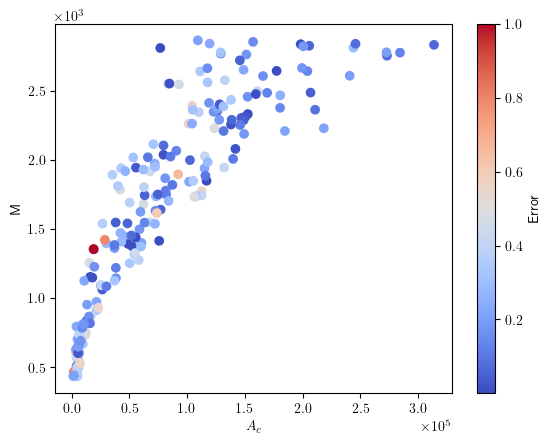

In [354]:
fig = plt.figure()
X_test_heatmap_b = pd.DataFrame(X_test_k)
col1 = np.abs(y_test_k - y_predict_rf_k)
col1 = col1/col1.max()
sc = plt.scatter(X_test_heatmap_b.get(4), X_test_heatmap_b.get(5), c=col1, cmap='coolwarm')
xtex = r"$A_c$"
ytext = r"M"
ctex = r"Error"
plt.xlabel(xlabel=xtex)
plt.ylabel(ylabel=ytext)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.colorbar(sc, label=ctex)
plt.savefig('./figures/monte-carlo-sampling-heatmap-kernel-error-predictwithclass.eps',format='eps',dpi=300)
plt.show()

### Heat map

<Figure size 640x480 with 0 Axes>

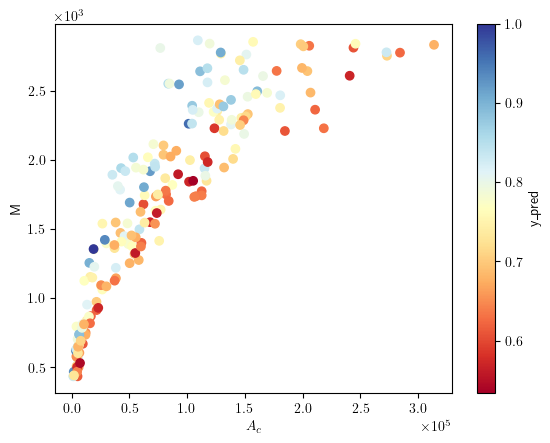

In [355]:
fig = plt.figure()
X_test_heatmap_b = pd.DataFrame(X_test_k)
col1 = y_test_k
col1 = col1/col1.max()
plt.show()
sc = plt.scatter(X_test_heatmap_b.get(4), X_test_heatmap_b.get(5), c=col1, cmap='RdYlBu')
xtex = r"$A_c$"
ytext = r"M"
ctex = r"y_pred"
plt.xlabel(xlabel=xtex)
plt.ylabel(ylabel=ytext)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.colorbar(sc, label=ctex)
plt.savefig('./figures/monte-carlo-sampling-heatmap-kernel-real.eps',format='eps',dpi=300)
plt.show()

In [356]:
print(X_train_k_std.shape)
print(y_train_k.shape)

(800, 6)
(800,)


In [357]:
# # TENSORFLOW
# def build_model():
#     model = keras.Sequential([
#         layers.Conv1D(16, 1, input_shape=[X_train_b_std.shape[1],1]),
#         layers.Conv1D(8, 1),
#         layers.Conv1D(4, 1),
#         #layers.Dense(32, activation='relu', input_shape=[X_train_b_std.shape[1]]),
#         #layers.Dropout(0.1),
#         #layers.Dense(16, activation='relu'),
#         #layers.Dropout(0.1),
#         layers.Flatten(),
#         layers.Dense(4, activation='relu'),
#         #layers.Dropout(0.1),
#         layers.Dense(1, activation='linear')
#     ])

#     optimizer = tf.keras.optimizers.Adam(0.001)

#     model.compile(loss='mse',
#         optimizer=optimizer,
#         metrics=['mae', 'mse'])
#     return model


# model = build_model()
# model.summary()

# def plot_history(history):
#     hist = pd.DataFrame(history.history)
#     hist['epoch'] = history.epoch

#     plt.figure()
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Abs Error [Strain]')
#     plt.plot(hist['epoch'], hist['mae'])
#     plt.ylabel('Mean Square Error [$Strain^2$]')
#     plt.plot(hist['epoch'], hist['mse'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
#     plt.legend()
#     plt.show()


# #early_stop = keras.callbacks.EarlyStopping(monitor='val_mae', patience=15, min_delta=1e-10)


# history = model.fit(X_train_b_std, y_train_b, epochs=1000, validation_split = 0.2, verbose=1)

# plot_history(history)

# test_predictions = model.predict(X_test_b_b_std).flatten()

# print(test_predictions.shape)
# print(y_test_b.shape)

# plt.scatter(y_test_b, test_predictions)
# plt.xlabel('True Values [Strain]')
# plt.ylabel('Predictions [Strain]')
# plt.axis('equal')
# plt.axis('square')
# plt.xlim([0,plt.xlim()[1]])
# plt.ylim([0,plt.ylim()[1]])
# _ = plt.plot([-100, 100], [-100, 100])
# plt.show()

# error = test_predictions - y_test_b
# plt.hist(error, bins = 25)
# plt.xlabel("Prediction Error [Strain]")
# _ = plt.ylabel("Count")
# plt.show()

# rmse_mlp = np.sqrt(metrics.mean_squared_error(y_test_b, test_predictions))
# mae_mlp = metrics.mean_absolute_error(y_test_b, test_predictions)
# r2_mlp = r2_score(y_test_b, test_predictions)
# mape_mlp = mean_absolute_percentage_error(y_test_b, test_predictions)

# print(f'RSME: {rmse_mlp} \n MAE: {mae_mlp} \n R2: {r2_mlp} \n MAPE: {mape_mlp} \n')

#### TENSORFLOW
def build_model():
    model = keras.Sequential([
        layers.Dense(32, activation='relu', input_shape=[X_train_kb_std.shape[1]]),
        layers.Dropout(0.1),
        layers.Dense(16, activation='relu'),
        layers.Dropout(0.1),
        layers.Dense(8, activation='relu'),
        layers.Dropout(0.1),
        layers.Dense(1, activation='linear')
    ])

    optimizer = tf.keras.optimizers.Adam(0.001)

    model.compile(loss='mse',
        optimizer=optimizer,
        metrics=['mae', 'mse'])
    return model


model = build_model()
model.summary()

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [Strain]')
    plt.plot(hist['epoch'], hist['mae'])
    plt.ylabel('Mean Square Error [$Strain^2$]')
    plt.plot(hist['epoch'], hist['mse'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
    plt.legend()
    plt.show()


#early_stop = keras.callbacks.EarlyStopping(monitor='val_mae', patience=15, min_delta=1e-10)


history = model.fit(X_train_kb_std, y_train_kb, epochs=1000, validation_split = 0.2, verbose=1)

plot_history(history)

test_predictions = model.predict(X_test_kb_std).flatten()

plt.scatter(y_test_kb[y_test_class==1], test_predictions[y_test_class==1])
plt.xlabel('True Values [Strain]')
plt.ylabel('Predictions [Strain]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])
plt.show()

error = test_predictions[y_test_class==1] - y_test_kb[y_test_class==1]
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Strain]")
_ = plt.ylabel("Count")
plt.show()

rmse_mlp = np.sqrt(metrics.mean_squared_error(y_test_kb[y_test_class==1], test_predictions[y_test_class==1]))
mae_mlp = metrics.mean_absolute_error(y_test_kb[y_test_class==1], test_predictions[y_test_class==1])
r2_mlp = r2_score(y_test_kb[y_test_class==1], test_predictions[y_test_class==1])
mape_mlp = mean_absolute_percentage_error(y_test_kb[y_test_class==1], test_predictions[y_test_class==1])

print(f'RMSE: {rmse_mlp} \n MAE: {mae_mlp} \n R2: {r2_mlp} \n MAPE: {mape_mlp} \n')

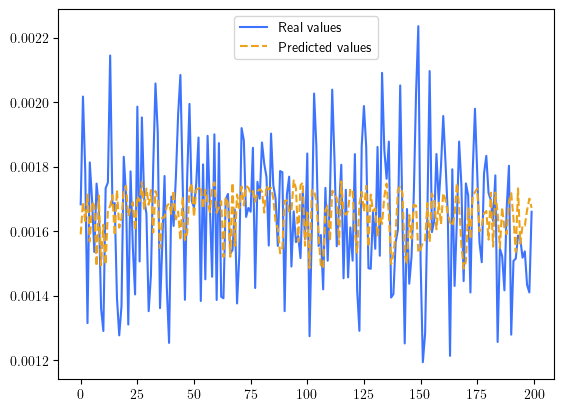

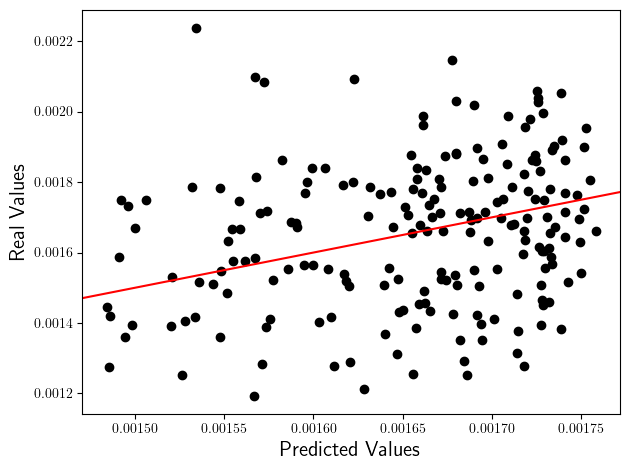

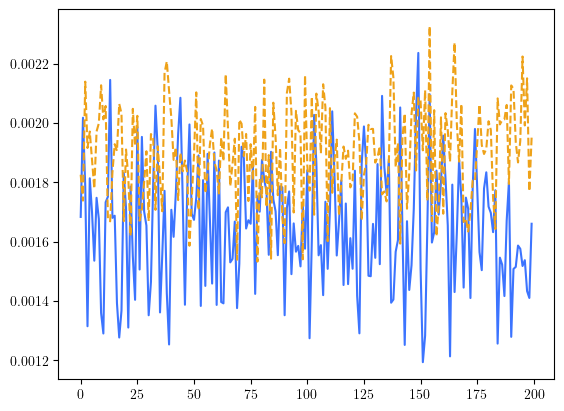

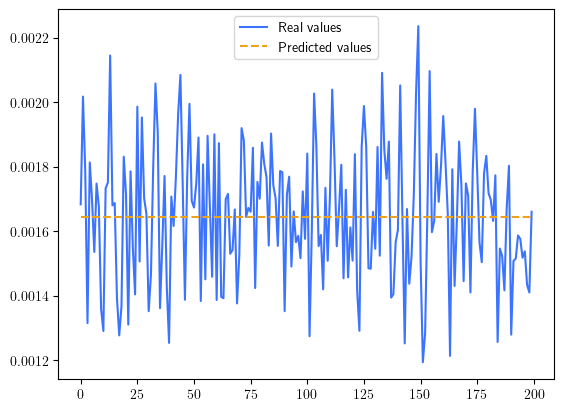

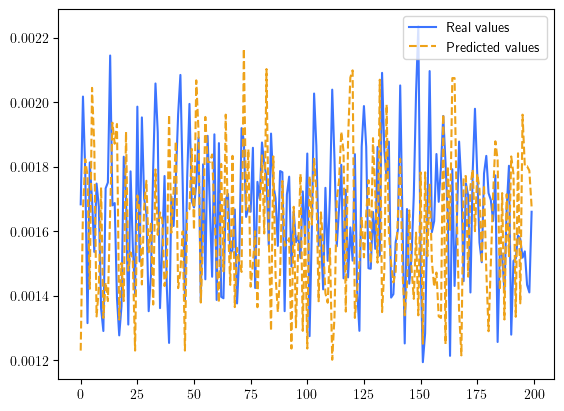

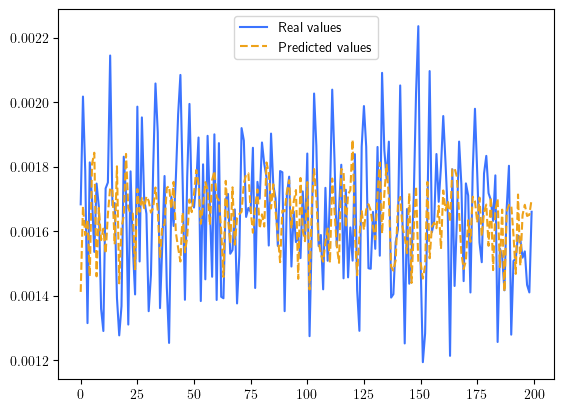

In [358]:
pretty_blue = '#3C74FF'
nice_orange = '#EEA219'

x=np.arange(0,len(y_test_k),1)

fig1_k = plt.figure()
plt.plot(x,y_test_k, '-', color=pretty_blue, label='Real values')
plt.plot(x,y_predict_lr_k, '--', color=nice_orange, label='Predicted values')
plt.legend()
plt.show()

fig_true_predict_k, ax = plt.subplots()
plt.plot(y_predict_lr_k, y_test_k, 'ok')
lim_x = ax.get_xlim()
lim_y = ax.get_ylim()
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, '-r')
ax.set_xlim(lim_x)
ax.set_ylim(lim_y)
plt.xlabel('Predicted Values', fontsize=15)
plt.ylabel('Real Values', fontsize=15)
plt.tight_layout()
plt.savefig('./figures/monte-carlo-sampling-kernel-regression-true-predict.eps',format='eps',dpi=300)
plt.show()

fig2_k = plt.figure()
plt.plot(x,y_test_k, '-', color=pretty_blue, label='Real values')
plt.plot(x,y_predict_mlp_k, '--', color=nice_orange, label='Predicted values')

fig3_k = plt.figure()
plt.plot(x,y_test_k, '-', color=pretty_blue, label='Real values')
plt.plot(x,y_predict_svr_k, '--', color=nice_orange, label='Predicted values')
plt.legend()
plt.show()

fig4_k = plt.figure()
plt.plot(x,y_test_k, '-', color=pretty_blue, label='Real values')
plt.plot(x,y_predict_dt_k, '--', color=nice_orange, label='Predicted values')
plt.savefig('./figures/monte-carlo-sampling-kernel-regression-dt.eps',format='eps',dpi=300)
plt.legend()
plt.show()

fig5_k = plt.figure()
plt.plot(x,y_test_k, '-', color=pretty_blue, label='Real values')
plt.plot(x,y_predict_rf_k, '--', color=nice_orange, label='Predicted values')
plt.legend()
plt.show()

#fig6_k = plt.figure()
#plt.plot(x,y_test_k, '-', color=pretty_blue, label='Real values')
#plt.plot(x,test_predictions, '--', color=nice_orange, label='Predicted values')
#plt.legend()
#plt.show()


### Kernel --> Bound

In [359]:
#Kernel data
#Train data
#data_k_train = pd.read_excel('train_kernel.xlsx') #this data contains samples from kernel (80%) and whole bound
#X_train_k = data_k_train.values[:, :-1]
#y_train_k = data_k_train.values[:, -1]
#Test data
#data_k_test = pd.read_excel('test_kernel.xlsx')
#X_test_k = data_k_test.values[:, :-1]
#y_test_k = data_k_test.values[:, -1]

#std = StandardScaler()
#X_train_k_std = std.fit_transform(X_train_k, y_train_k)
#X_test_k_std = std.transform(X_test_k)

#### Regression Models

In [360]:
lr = LinearRegression()
lr.fit(X_train_k_std, y_train_k)
y_predict_lr_k = lr.predict(X_test_k_b_std)
# plt.scatter(np.arange(len(y_test_k)), y_predict_lr_k, linewidth=5)
# plt.plot(y_predict_lr_k)

svr = SVR()
svr.fit(X_train_k_std, y_train_k)
y_predict_svr_k = svr.predict(X_test_k_b_std)
# plt.plot(y_predict_svr_k)

mae_dt = []
mse_dt = []
for r in range(5):
    dt = DecisionTreeRegressor()
    dt.fit(X_train_k_std, y_train_k)
    y_predict_dt_k = dt.predict(X_test_k_b_std)
    #mae = metrics.mean_absolute_error(y_test, y_predict_dt)
    #mse = metrics.mean_squared_error(y_test, y_predict_dt)
    mae = metrics.mean_absolute_error(y_test_b, y_predict_dt_k)
    mse = metrics.mean_squared_error(y_test_b, y_predict_dt_k)
    mae_dt.append(mae)
    mse_dt.append(mse)
    # plt.plot(y_test_k)
    # plt.plot(y_predict_dt_k)

    
mae_rf = []
mse_rf = []
for r in range(5):
    rf = RandomForestRegressor()
    rf.fit(X_train_k_std, y_train_k)
    y_predict_rf_k = rf.predict(X_test_k_b_std)
    #mae = metrics.mean_absolute_error(y_test, y_predict_rf)
    #mse = metrics.mean_squared_error(y_test, y_predict_rf)
    mae = metrics.mean_absolute_error(y_test_b, y_predict_rf_k)
    mse = metrics.mean_squared_error(y_test_b, y_predict_rf_k)
    mae_rf.append(mae)
    mse_rf.append(mse)  

#rf = RandomForestRegressor()
#rf.fit(X_train_k_std, y_train_k)
#y_predict_rf_k = rf.predict(X_test_k_b_std)
# plt.plot(y_test_k)
# plt.scatter(np.arange(len(y_test_k)), y_predict_rf_k, linewidth=5)


rmse_lr = np.sqrt(metrics.mean_squared_error(y_test_b, y_predict_lr_k))
rmse_svr = np.sqrt(metrics.mean_squared_error(y_test_b, y_predict_svr_k))
#rmse_dt = np.sqrt(metrics.mean_squared_error(y_test_b, y_predict_dt_k))
#rmse_rf = np.sqrt(metrics.mean_squared_error(y_test_b, y_predict_rf_k))
rmse_dt = np.mean(mse_dt)
rmse_rf = np.mean(mse_rf)
print('\n', rmse_lr, '\n', rmse_svr, '\n', rmse_dt, '\n', rmse_rf, '\n', )



 0.001089471206240303 
 0.00110813094262488 
 1.1823967355357077e-06 
 1.1784196710027513e-06 



## Testing the Bound

### Bound --> Bound

In [361]:
#Kernel data
#Train data
#data_k_train = pd.read_excel('train_kernel_bound_forKernel.xlsx') #this data contains samples from kernel (80%) and whole bound
#X_train_k = data_k_train.values[:, :-1]
#y_train_k = data_k_train.values[:, -1]
#Test data
#data_k_test = pd.read_excel('test_kernel.xlsx')
#X_test_k = data_k_test.values[:, :-1]', rmse_svr, '\n', 'DT: ''\t', rmse_dt, '\n', 'RF: ''\t', rmse_rf, '\n', )
#y_test_k = data_k_test.values[:, -1]

#### Regression models

In [362]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import metrics

mlp = MLPRegressor(learning_rate='constant', activation='logistic', alpha= 0.05, hidden_layer_sizes= (50, 100, 50), solver= 'adam')
mlp.fit(X_train_b_std, y_train_b)
y_predict_mlp_b = mlp.predict(X_test_b_b_std)

lr = LinearRegression()
lr.fit(X_train_b_std, y_train_b)
y_predict_lr_b = lr.predict(X_test_b_b_std)
# plt.scatter(np.arange(len(y_test_k)), y_predict_lr_k, linewidth=5)
# plt.plot(y_predict_lr_k)

svr = SVR()
svr.fit(X_train_b_std, y_train_b)
y_predict_svr_b = svr.predict(X_test_b_b_std)
# plt.plot(y_predict_svr_k)

mae_dt = []
rmse_dt = []
r2_dt = []
mape_dt = []
for r in range(5):
    dt = DecisionTreeRegressor()
    dt.fit(X_train_b_std, y_train_b)
    y_predict_dt_b = dt.predict(X_test_b_b_std)
    #mae = metrics.mean_absolute_error(y_test, y_predict_dt)
    #mse = metrics.mean_squared_error(y_test, y_predict_dt)
    mae = metrics.mean_absolute_error(y_test_b, y_predict_dt_b)
    rmse = np.sqrt(metrics.mean_squared_error(y_test_b, y_predict_dt_b))
    r2 = r2_score(y_test_b, y_predict_dt_b)
    mape = mean_absolute_percentage_error(y_test_b, y_predict_dt_b)
    mae_dt.append(mae)
    rmse_dt.append(rmse)
    r2_dt.append(r2)
    mape_dt.append(mape)
    # plt.plot(y_test_k)
    # plt.plot(y_predict_dt_k)

mae_rf = []
rmse_rf = []
r2_rf = []
mape_rf = []
for r in range(5):
    rf = RandomForestRegressor()
    rf.fit(X_train_b_std, y_train_b)
    y_predict_rf_b = rf.predict(X_test_b_b_std)
    #mae = metrics.mean_absolute_error(y_test, y_predict_rf)
    #mse = metrics.mean_squared_error(y_test, y_predict_rf)
    mae = metrics.mean_absolute_error(y_test_b, y_predict_rf_b)
    rmse = np.sqrt(metrics.mean_squared_error(y_test_b, y_predict_rf_b))
    r2 = r2_score(y_test_b, y_predict_rf_b)
    mape = mean_absolute_percentage_error(y_test_b, y_predict_rf_b)
    mae_rf.append(mae)
    rmse_rf.append(rmse)
    r2_rf.append(r2)
    mape_rf.append(mape)
    # plt.plot(y_test_k)
    # plt.scatter(np.arange(len(y_test_k)), y_predict_rf_k, linewidth=5)


rmse_lr = np.sqrt(metrics.mean_squared_error(y_test_b, y_predict_lr_b))
rmse_mlp = np.sqrt(metrics.mean_squared_error(y_test_b, y_predict_mlp_b))
rmse_svr = np.sqrt(metrics.mean_squared_error(y_test_b, y_predict_svr_b))
rmse_dt = np.mean(rmse_dt)
rmse_rf = np.mean(rmse_rf)
mae_lr = metrics.mean_absolute_error(y_test_b, y_predict_lr_b)
mae_mlp = metrics.mean_absolute_error(y_test_b, y_predict_mlp_b)
mae_svr = metrics.mean_absolute_error(y_test_b, y_predict_svr_b)
mae_dt = np.mean(mae_dt)
mae_rf = np.mean(mae_rf)
r2_lr = r2_score(y_test_b, y_predict_lr_b)
r2_mlp = r2_score(y_test_b, y_predict_mlp_b)
r2_svr = r2_score(y_test_b, y_predict_svr_b)
r2_dt = np.mean(r2_dt)
r2_rf = np.mean(r2_rf)
mape_lr = mean_absolute_percentage_error(y_test_b, y_predict_svr_b)
mape_mlp = mean_absolute_percentage_error(y_test_b, y_predict_mlp_b)
mape_svr = mean_absolute_percentage_error(y_test_b, y_predict_svr_b)
mape_dt = np.mean(mape_dt)
mape_rf = np.mean(mape_rf)

print('Root Mean Squared Error:''\n', 'LR: ''\t', rmse_lr, '\n', 'MLP: ''\t', rmse_mlp, '\n', 'SVR: ''\t', rmse_svr, '\n', 'DT: ''\t', rmse_dt, '\n', 'RF: ''\t', rmse_rf, '\n', )
print('Mean Absolute Error:''\n', 'LR: ''\t', mae_lr, '\n', 'MLP: ''\t', mae_mlp, '\n', 'SVR: ''\t', mae_svr, '\n', 'DT: ''\t', mae_dt, '\n', 'RF: ''\t', mae_rf, '\n', )
print('R2 Score:''\n', 'LR: ''\t', r2_lr, '\n', 'MLP: ''\t', r2_mlp, '\n', 'SVR: ''\t', r2_svr, '\n', 'DT: ''\t', r2_dt, '\n', 'RF: ''\t', r2_rf, '\n', )
print('MAPE Score:''\n', 'LR: ''\t', mape_lr, '\n', 'MLP: ''\t', mape_mlp, '\n', 'SVR: ''\t', mape_svr, '\n', 'DT: ''\t', mape_dt, '\n', 'RF: ''\t', mape_rf, '\n', )

print(f'LR & {rmse_lr} & {mae_lr} & {round(r2_lr,5)} & {round(mape_lr,5)} \\\\')
print(f'SVR & {rmse_svr} & {mae_svr} & {round(r2_svr,5)} & {round(mape_svr,5)} \\\\')
print(f'DT$_5$ & {rmse_dt} & {mae_dt} & {round(r2_dt,5)} & {round(mape_dt,5)} \\\\')
print(f'RF$_5$ & {rmse_rf} & {mae_rf} & {round(r2_rf,5)} & {round(mape_rf,5)} \\\\')
print(f'MLP & {round(rmse_mlp,5)} & {round(mae_mlp,5)} & {round(r2_mlp,5)} & {round(mape_mlp,5)} \\\\')

Root Mean Squared Error:
 LR: 	 6.09322398131102e-05 
 MLP: 	 0.0008869832587989858 
 SVR: 	 6.27173413416276e-05 
 DT: 	 7.59679785653368e-05 
 RF: 	 5.004134198808005e-05 

Mean Absolute Error:
 LR: 	 4.8534756664577966e-05 
 MLP: 	 0.0008673580855135903 
 SVR: 	 4.9882376031938675e-05 
 DT: 	 5.360803881129042e-05 
 RF: 	 3.771760380538622e-05 

R2 Score:
 LR: 	 0.04872157272599553 
 MLP: 	 -200.5784996978124 
 SVR: 	 -0.007833157382287403 
 DT: 	 -0.47898094931976604 
 RF: 	 0.3583368319389149 

MAPE Score:
 LR: 	 0.09455302718909263 
 MLP: 	 1.6425860067080122 
 SVR: 	 0.09455302718909263 
 DT: 	 0.1009614982739719 
 RF: 	 0.0726210996350194 

LR & 6.09322398131102e-05 & 4.8534756664577966e-05 & 0.04872 & 0.09455 \\
SVR & 6.27173413416276e-05 & 4.9882376031938675e-05 & -0.00783 & 0.09455 \\
DT$_5$ & 7.59679785653368e-05 & 5.360803881129042e-05 & -0.47898 & 0.10096 \\
RF$_5$ & 5.004134198808005e-05 & 3.771760380538622e-05 & 0.35834 & 0.07262 \\
MLP & 0.00089 & 0.00087 & -200.5785 &

## ML vs True comparison

test_df_b = X_test_b.copy()
test_df_b.insert(len(test_df_b.columns), 'true', y_test_b)
test_df_b.insert(len(test_df_b.columns), 'lr_predict', y_predict_lr_b)
test_df_b.insert(len(test_df_b.columns), 'mlp_predict', y_predict_mlp_b)
test_df_b.insert(len(test_df_b.columns), 'svr_predict', y_predict_svr_b)
test_df_b.insert(len(test_df_b.columns), 'dt_predict', y_predict_dt_b)
test_df_b.insert(len(test_df_b.columns), 'rf_predict', y_predict_rf_b)
test_df_b

train_df_b = X_train_b.copy()
train_df_b.insert(len(train_df_b.columns), 'true', y_train_b)
train_df_b.insert(len(train_df_b.columns), 'lr_predict', lr.predict(X_train_b_std))
train_df_b.insert(len(train_df_b.columns), 'mlp_predict', mlp.predict(X_train_b_std))
train_df_b.insert(len(train_df_b.columns), 'svr_predict', svr.predict(X_train_b_std))
train_df_b.insert(len(train_df_b.columns), 'dt_predict', dt.predict(X_train_b_std))
train_df_b.insert(len(train_df_b.columns), 'rf_predict', rf.predict(X_train_b_std))
train_df_b

df_b = pd.concat([train_df_b, test_df_b], ignore_index=True, axis=0)
df_b.to_csv(f'./data/boundary{n_bound}-with-predictions.csv', index=False)
df_b

# Heat map

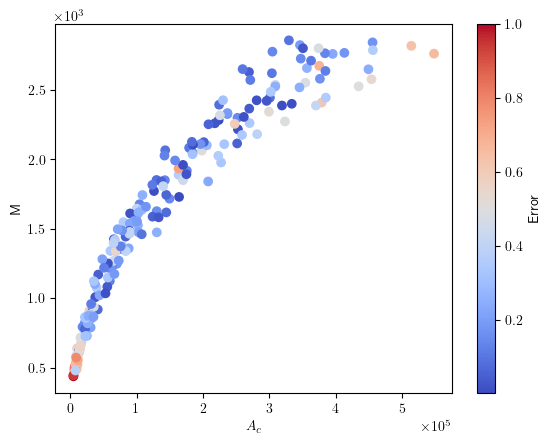

In [363]:
fig = plt.figure()
X_test_heatmap_b = pd.DataFrame(X_test_b)
col1 = np.abs(y_test_b - y_predict_lr_b)
col1 = col1/col1.max()
sc = plt.scatter(X_test_heatmap_b.get(4), X_test_heatmap_b.get(5), c=col1, cmap='coolwarm')
xtex = r"$A_c$"
ytext = r"M"
ctex = r"Error"
plt.xlabel(xlabel=xtex)
plt.ylabel(ylabel=ytext)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.colorbar(sc, label=ctex)
plt.savefig('./figures/monte-carlo-sampling-heatmap-bound-error-predictwithclass.eps',format='eps',dpi=300)
plt.show()

In [364]:
#X_test_heatmap_b = pd.DataFrame(X_test_b)
#X_test_heatmap_b = X_test_heatmap_b.assign(A = y_predict_lr_b)
#X_test_heatmap_b = X_test_heatmap_b.drop(columns=[0,1,2,5])
#X_test_heatmap_b.to_csv("predict-bound.csv",index=False, header=False)

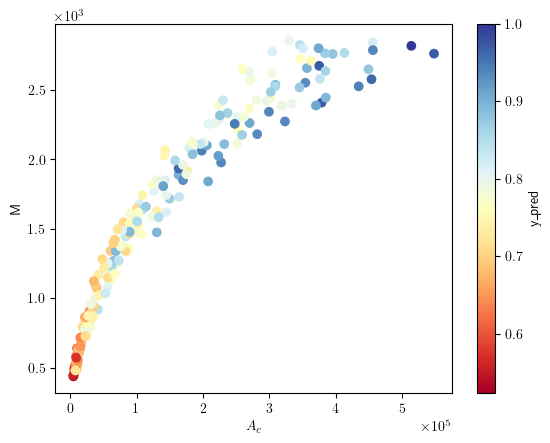

In [365]:
fig = plt.figure()
X_test_heatmap_b = pd.DataFrame(X_test_b)
col2 = y_test_b
col2 = col2/col2.max()
sc = plt.scatter(X_test_heatmap_b.get(4), X_test_heatmap_b.get(5), c=col2, cmap='RdYlBu')
xtex = r"$A_c$"
ytext = r"M"
ctex = r"y_pred"
plt.xlabel(xlabel=xtex)
plt.ylabel(ylabel=ytext)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.colorbar(sc, label=ctex)
plt.savefig('./figures/monte-carlo-sampling-heatmap-bound-real.eps',format='eps',dpi=300)
plt.show()

In [366]:
col_bool = col1 == col2
col_bool[col_bool==True]

Series([], Name: 6, dtype: bool)

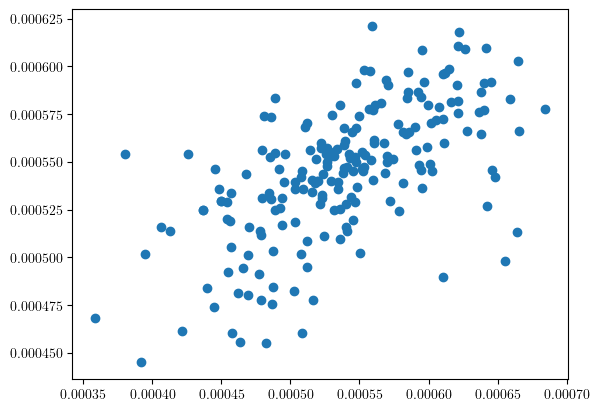

In [367]:
figsct_b1 = plt.figure()
plt.scatter(y_test_b, y_predict_rf_b)


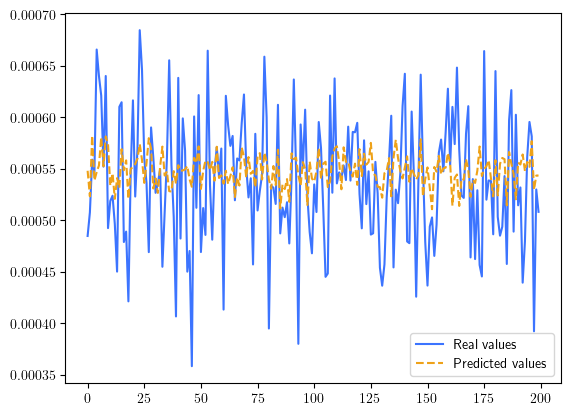

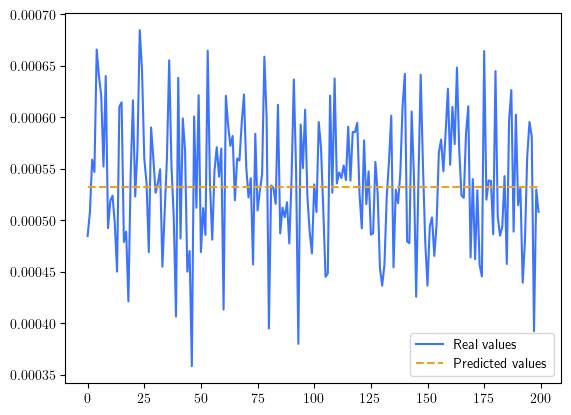

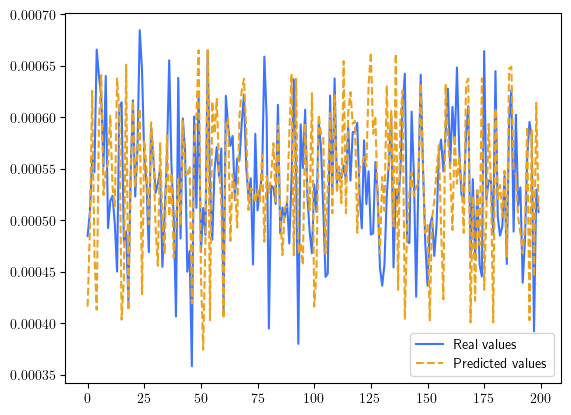

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


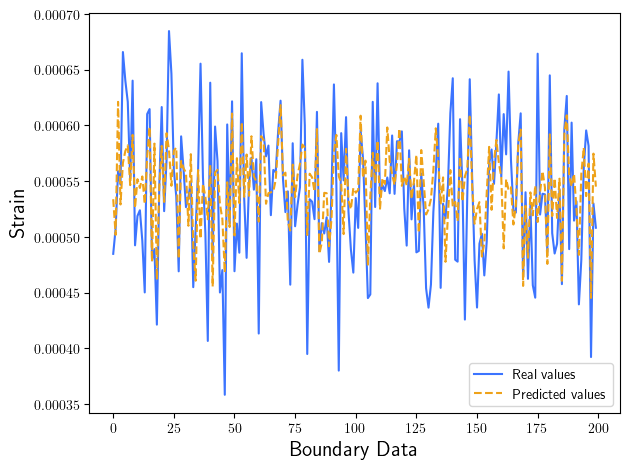

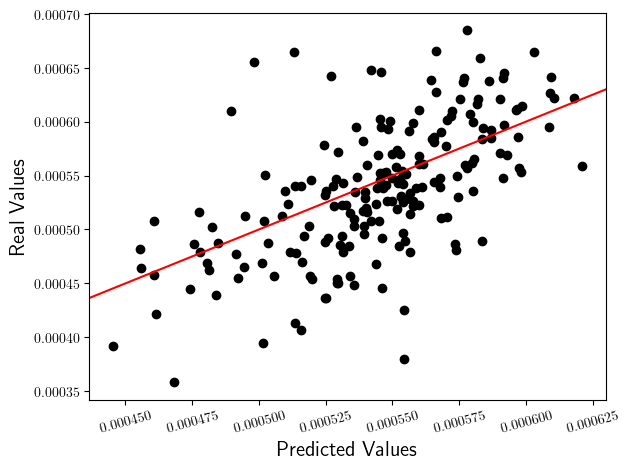

In [368]:
x=np.arange(0,len(y_test_b),1)

fig1_b = plt.figure()
plt.plot(x,y_test_b, '-', color=pretty_blue, label='Real values')
plt.plot(x,y_predict_lr_b, '--', color=nice_orange, label='Predicted values')
plt.legend()
plt.show()

fig2_b = plt.figure()
plt.plot(x,y_test_b, '-', color=pretty_blue, label='Real values')
plt.plot(x,y_predict_svr_b, '--', color=nice_orange, label='Predicted values')
plt.legend()
plt.show()

fig3_b = plt.figure()
plt.plot(x,y_test_b, '-', color=pretty_blue, label='Real values')
plt.plot(x,y_predict_dt_b, '--', color=nice_orange, label='Predicted values')
plt.legend()
plt.show()

fig4_b = plt.figure()
plt.plot(x,y_test_b, '-', color=pretty_blue, label='Real values')
plt.plot(x,y_predict_rf_b, '--', color=nice_orange, label='Predicted values')
plt.xlabel('Boundary Data', fontsize=15)
plt.ylabel('Strain', fontsize=15)
plt.legend()
plt.tight_layout()
plt.savefig('./figures/monte-carlo-sampling-bound-regression.eps',format='eps',dpi=300)
plt.savefig('./figures/monte-carlo-sampling-bound-regression.svg')
plt.show()

fig_true_predict_b, ax = plt.subplots()
plt.plot(y_predict_rf_b, y_test_b, 'ok')
lim_x = ax.get_xlim()
lim_y = ax.get_ylim()
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, '-r')
ax.set_xlim(lim_x)
ax.set_ylim(lim_y)
plt.xlabel('Predicted Values', fontsize=15)
plt.ylabel('Real Values', fontsize=15)
plt.xticks(rotation=15)
plt.tight_layout()
plt.savefig('./figures/monte-carlo-sampling-bound-regression-true-predict.eps',format='eps',dpi=300)
plt.show()

### Bound --> Kernel

In [369]:
#Kernel data
#Train data
#data_k_train = pd.read_excel('train_kernel.xlsx') #this data contains samples from kernel (80%) and whole bound
#X_train_k = data_k_train.values[:, :-1]
#y_train_k = data_k_train.values[:, -1]
#Test data
#data_k_test = pd.read_excel('test_kernel.xlsx')
#X_test_k = data_k_test.values[:, :-1]
#y_test_k = data_k_test.values[:, -1]

#std = StandardScaler()
#X_train_k_std = std.fit_transform(X_train_k, y_train_k)
#X_test_k_std = std.transform(X_test_k)

#### Regression Models

In [370]:
lr = LinearRegression()
lr.fit(X_train_b_std, y_train_b)
y_predict_lr_b = lr.predict(X_test_b_k_std)
# plt.scatter(np.arange(len(y_test_k)), y_predict_lr_k, linewidth=5)
# plt.plot(y_predict_lr_k)

svr = SVR()
svr.fit(X_train_b_std, y_train_b)
y_predict_svr_b = svr.predict(X_test_b_k_std)
# plt.plot(y_predict_svr_k)

mae_dt = []
mse_dt = []
for r in range(5):
    dt = DecisionTreeRegressor()
    dt.fit(X_train_b_std, y_train_b)
    y_predict_dt_b = dt.predict(X_test_b_k_std)
    #mae = metrics.mean_absolute_error(y_test, y_predict_dt)
    #mse = metrics.mean_squared_error(y_test, y_predict_dt)
    mae = metrics.mean_absolute_error(y_test_k, y_predict_dt_b)
    mse = metrics.mean_squared_error(y_test_k, y_predict_dt_b)
    mae_dt.append(mae)
    mse_dt.append(mse)
    # plt.plot(y_test_k)
    # plt.plot(y_predict_dt_k)

    
mae_rf = []
mse_rf = []
for r in range(5):
    rf = RandomForestRegressor()
    rf.fit(X_train_b_std, y_train_b)
    y_predict_rf_b = rf.predict(X_test_b_k_std)
    #mae = metrics.mean_absolute_error(y_test, y_predict_rf)
    #mse = metrics.mean_squared_error(y_test, y_predict_rf)
    mae = metrics.mean_absolute_error(y_test_k, y_predict_rf_b)
    mse = metrics.mean_squared_error(y_test_k, y_predict_rf_b)
    mae_rf.append(mae)
    mse_rf.append(mse)  

#rf = RandomForestRegressor()
#rf.fit(X_train_k_std, y_train_k)
#y_predict_rf_k = rf.predict(X_test_k_b_std)
# plt.plot(y_test_k)
# plt.scatter(np.arange(len(y_test_k)), y_predict_rf_k, linewidth=5)


rmse_lr = np.sqrt(metrics.mean_squared_error(y_test_k, y_predict_lr_b))
rmse_svr = np.sqrt(metrics.mean_squared_error(y_test_k, y_predict_svr_b))
#rmse_dt = np.sqrt(metrics.mean_squared_error(y_test_k, y_predict_dt_b))
#rmse_rf = np.sqrt(metrics.mean_squared_error(y_test_k, y_predict_rf_b))
rmse_dt = np.mean(mse_dt)
rmse_rf = np.mean(mse_rf)
print('\n', rmse_lr, '\n', rmse_svr, '\n', rmse_dt, '\n', rmse_rf, '\n', )





 0.0011274626814531184 
 0.0011406103674980901 
 1.3051002958986646e-06 
 1.2828767372718042e-06 



## Testing the Kernel + Bound

### Kernel + Bound --> Kernel

In [371]:
#Kernel data
#Train data
#data_k_train = pd.read_excel('train_kernel_bound_forKernel.xlsx') #this data contains samples from kernel (80%) and whole bound
#X_train_k = data_k_train.values[:, :-1]
#y_train_k = data_k_train.values[:, -1]
#Test data
#data_k_test = pd.read_excel('test_kernel.xlsx')
#X_test_k = data_k_test.values[:, :-1]
#y_test_k = data_k_test.values[:, -1]

#### Regression models

In [372]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import metrics

lr = LinearRegression()
lr.fit(X_train_kb_std, y_train_kb)
y_predict_lr_kb = lr.predict(X_test_kb_k_std)
# plt.scatter(np.arange(len(y_test_k)), y_predict_lr_k, linewidth=5)
# plt.plot(y_predict_lr_k)

svr = SVR()
svr.fit(X_train_kb_std, y_train_kb)
y_predict_svr_kb = svr.predict(X_test_kb_k_std)
# plt.plot(y_predict_svr_k)

mae_dt = []
mse_dt = []
for r in range(5):
    dt = DecisionTreeRegressor()
    dt.fit(X_train_kb_std, y_train_kb)
    y_predict_dt_kb = dt.predict(X_test_kb_k_std)
    #mae = metrics.mean_absolute_error(y_test, y_predict_dt)
    #mse = metrics.mean_squared_error(y_test, y_predict_dt)
    mae = metrics.mean_absolute_error(y_test_k, y_predict_dt_kb)
    mse = metrics.mean_squared_error(y_test_k, y_predict_dt_kb)
    mae_dt.append(mae)
    mse_dt.append(mse)
    # plt.plot(y_test_k)
    # plt.plot(y_predict_dt_k)

mae_rf = []
mse_rf = []
for r in range(5):
    rf = RandomForestRegressor()
    rf.fit(X_train_kb_std, y_train_kb)
    y_predict_rf_kb = rf.predict(X_test_kb_k_std)
    #mae = metrics.mean_absolute_error(y_test, y_predict_rf)
    #mse = metrics.mean_squared_error(y_test, y_predict_rf)
    mae = metrics.mean_absolute_error(y_test_k, y_predict_rf_kb)
    mse = metrics.mean_squared_error(y_test_k, y_predict_rf_kb)
    mae_rf.append(mae)
    mse_rf.append(mse)
    # plt.plot(y_test_k)
    # plt.scatter(np.arange(len(y_test_k)), y_predict_rf_k, linewidth=5)


rmse_lr = np.sqrt(metrics.mean_squared_error(y_test_k, y_predict_lr_kb))
rmse_svr = np.sqrt(metrics.mean_squared_error(y_test_k, y_predict_svr_kb))
#rmse_dt = np.sqrt(metrics.mean_squared_error(y_test_k, y_predict_dt_k))
#rmse_rf = np.sqrt(metrics.mean_squared_error(y_test_k, y_predict_rf_k))
rmse_dt = np.mean(mse_dt)
rmse_rf = np.mean(mse_rf)
print('\n', rmse_lr, '\n', rmse_svr, '\n', rmse_dt, '\n', rmse_rf, '\n', )
#print(mse_dt, mse_rf)


 0.0005182550941560213 
 0.0004307974101604944 
 4.918741146539023e-07 
 2.593921489786117e-07 



### Kernel + Bound --> Bound

In [373]:
#Kernel data
#Train data
#data_k_train = pd.read_excel('train_kernel.xlsx') #this data contains samples from kernel (80%) and whole bound
#X_train_k = data_k_train.values[:, :-1]
#y_train_k = data_k_train.values[:, -1]
#Test data
#data_k_test = pd.read_excel('test_kernel.xlsx')
#X_test_k = data_k_test.values[:, :-1]
#y_test_k = data_k_test.values[:, -1]

#std = StandardScaler()
#X_train_k_std = std.fit_transform(X_train_k, y_train_k)
#X_test_k_std = std.transform(X_test_k)

#### Regression Models

In [374]:
lr = LinearRegression()
lr.fit(X_train_kb_std, y_train_kb)
y_predict_lr_kb = lr.predict(X_test_kb_b_std)
# plt.scatter(np.arange(len(y_test_k)), y_predict_lr_k, linewidth=5)
# plt.plot(y_predict_lr_k)

svr = SVR()
svr.fit(X_train_kb_std, y_train_kb)
y_predict_svr_kb = svr.predict(X_test_kb_b_std)
# plt.plot(y_predict_svr_k)

mae_dt = []
mse_dt = []
for r in range(5):
    dt = DecisionTreeRegressor()
    dt.fit(X_train_kb_std, y_train_kb)
    y_predict_dt_kb = dt.predict(X_test_kb_b_std)
    #mae = metrics.mean_absolute_error(y_test, y_predict_dt)
    #mse = metrics.mean_squared_error(y_test, y_predict_dt)
    mae = metrics.mean_absolute_error(y_test_b, y_predict_dt_kb)
    mse = metrics.mean_squared_error(y_test_b, y_predict_dt_kb)
    mae_dt.append(mae)
    mse_dt.append(mse)
    # plt.plot(y_test_k)
    # plt.plot(y_predict_dt_k)

    
mae_rf = []
mse_rf = []
for r in range(5):
    rf = RandomForestRegressor()
    rf.fit(X_train_kb_std, y_train_kb)
    y_predict_rf_kb = rf.predict(X_test_kb_b_std)
    #mae = metrics.mean_absolute_error(y_test, y_predict_rf)
    #mse = metrics.mean_squared_error(y_test, y_predict_rf)
    mae = metrics.mean_absolute_error(y_test_b, y_predict_rf_kb)
    mse = metrics.mean_squared_error(y_test_b, y_predict_rf_kb)
    mae_rf.append(mae)
    mse_rf.append(mse)  

#rf = RandomForestRegressor()
#rf.fit(X_train_k_std, y_train_k)
#y_predict_rf_k = rf.predict(X_test_k_b_std)
# plt.plot(y_test_k)
# plt.scatter(np.arange(len(y_test_k)), y_predict_rf_k, linewidth=5)


rmse_lr = np.sqrt(metrics.mean_squared_error(y_test_b, y_predict_lr_kb))
rmse_svr = np.sqrt(metrics.mean_squared_error(y_test_b, y_predict_svr_kb))
#rmse_dt = np.sqrt(metrics.mean_squared_error(y_test_b, y_predict_dt_k))
#rmse_rf = np.sqrt(metrics.mean_squared_error(y_test_b, y_predict_rf_k))
rmse_dt = np.mean(mse_dt)
rmse_rf = np.mean(mse_rf)
print('\n', rmse_lr, '\n', rmse_svr, '\n', rmse_dt, '\n', rmse_rf, '\n', )



 0.0005247107128349207 
 0.0007418813180821928 
 5.274611098495513e-07 
 2.77086188957365e-07 



### Kernel + Bound --> Kernel + Bound

In [375]:
#Kernel data
#Train data
#data_k_train = pd.read_excel('train_kernel.xlsx') #this data contains samples from kernel (80%) and whole bound
#X_train_k = data_k_train.values[:, :-1]
#y_train_k = data_k_train.values[:, -1]
#Test data
#data_k_test = pd.read_excel('test_kernel.xlsx')
#X_test_k = data_k_test.values[:, :-1]
#y_test_k = data_k_test.values[:, -1]

#std = StandardScaler()
#X_train_k_std = std.fit_transform(X_train_k, y_train_k)
#X_test_k_std = std.transform(X_test_k)

#### Regression Models

In [376]:
mlp = MLPRegressor(learning_rate='constant', activation='logistic', alpha= 0.05, hidden_layer_sizes= (50, 100, 50), solver= 'adam')
mlp.fit(X_train_kb_std, y_train_kb)
y_predict_mlp_kb = mlp.predict(X_test_kb_std)
y_predict_mlp_kernel = y_predict_mlp_kb[y_test_class==0]
y_predict_mlp_bound = y_predict_mlp_kb[y_test_class==1]

lr = LinearRegression()
lr.fit(X_train_kb_std, y_train_kb)
y_predict_lr_kb = lr.predict(X_test_kb_std)
y_predict_lr_kernel = y_predict_lr_kb[y_test_class==0]
y_predict_lr_bound = y_predict_lr_kb[y_test_class==1]
# plt.scatter(np.arange(len(y_test_k)), y_predict_lr_k, linewidth=5)
# plt.plot(y_predict_lr_k)

svr = SVR()
svr.fit(X_train_kb_std, y_train_kb)
y_predict_svr_kb = svr.predict(X_test_kb_std)
y_predict_svr_kernel = y_predict_svr_kb[y_test_class==0]
y_predict_svr_bound = y_predict_svr_kb[y_test_class==1]
# plt.plot(y_predict_svr_k)

mae_dt = []
rmse_dt = []
r2_dt = []
mape_dt = []

mae_k_dt = []
rmse_k_dt = []
r2_k_dt = []
mape_k_dt = []

mae_b_dt = []
rmse_b_dt = []
r2_b_dt = []
mape_b_dt = []
for r in range(5):
    dt = DecisionTreeRegressor()
    dt.fit(X_train_kb_std, y_train_kb)
    y_predict_dt_kb = dt.predict(X_test_kb_std)
    y_predict_dt_kernel = y_predict_dt_kb[y_test_class==0]
    y_predict_dt_bound = y_predict_dt_kb[y_test_class==1]
    #mae = metrics.mean_absolute_error(y_test, y_predict_dt)
    #mse = metrics.mean_squared_error(y_test, y_predict_dt)
    mae = metrics.mean_absolute_error(y_test_kb, y_predict_dt_kb)
    rmse = np.sqrt(metrics.mean_squared_error(y_test_kb, y_predict_dt_kb))
    r2 = r2_score(y_test_kb, y_predict_dt_kb)
    mape = mean_absolute_percentage_error(y_test_kb, y_predict_dt_kb)

    mae_k = metrics.mean_absolute_error(y_test_kb[y_test_class==0], y_predict_dt_kernel)
    rmse_k = np.sqrt(metrics.mean_squared_error(y_test_kb[y_test_class==0], y_predict_dt_kernel))
    r2_k = r2_score(y_test_kb[y_test_class==0], y_predict_dt_kernel)
    mape_k = mean_absolute_percentage_error(y_test_kb[y_test_class==0], y_predict_dt_kernel)

    mae_b = metrics.mean_absolute_error(y_test_kb[y_test_class==1], y_predict_dt_bound)
    rmse_b = np.sqrt(metrics.mean_squared_error(y_test_kb[y_test_class==1], y_predict_dt_bound))
    r2_b = r2_score(y_test_kb[y_test_class==1], y_predict_dt_bound)
    mape_b = mean_absolute_percentage_error(y_test_kb[y_test_class==1], y_predict_dt_bound)

    mae_dt.append(mae)
    rmse_dt.append(rmse)
    r2_dt.append(r2)
    mape_dt.append(mape)

    mae_k_dt.append(mae_k)
    rmse_k_dt.append(rmse_k)
    r2_k_dt.append(r2_k)
    mape_k_dt.append(mape_k)

    mae_b_dt.append(mae_b)
    rmse_b_dt.append(rmse_b)
    r2_b_dt.append(r2_b)
    mape_b_dt.append(mape_b)
    # plt.plot(y_test_k)
    # plt.plot(y_predict_dt_k)

    
mae_rf = []
rmse_rf = []
r2_rf = []
mape_rf = []

mae_k_rf = []
rmse_k_rf = []
r2_k_rf = []
mape_k_rf= []

mae_b_rf = []
rmse_b_rf = []
r2_b_rf = []
mape_b_rf = []
for r in range(5):
    rf = RandomForestRegressor()
    rf.fit(X_train_kb_std, y_train_kb)
    y_predict_rf_kb = rf.predict(X_test_kb_std)
    y_predict_rf_kernel = y_predict_rf_kb[y_test_class==0]
    y_predict_rf_bound = y_predict_rf_kb[y_test_class==1]
    #mae = metrics.mean_absolute_error(y_test, y_predict_rf)
    #mse = metrics.mean_squared_error(y_test, y_predict_rf)
    mae = metrics.mean_absolute_error(y_test_kb, y_predict_rf_kb)
    rmse = np.sqrt(metrics.mean_squared_error(y_test_kb, y_predict_rf_kb))
    r2 = r2_score(y_test_kb, y_predict_rf_kb)
    mape = mean_absolute_percentage_error(y_test_kb, y_predict_rf_kb)

    mae_k = metrics.mean_absolute_error(y_test_kb[y_test_class==0], y_predict_rf_kernel)
    rmse_k = np.sqrt(metrics.mean_squared_error(y_test_kb[y_test_class==1], y_predict_rf_kernel))
    r2_k = r2_score(y_test_kb[y_test_class==0], y_predict_rf_kernel)
    mpae_k = mean_absolute_percentage_error(y_test_kb[y_test_class==0], y_predict_rf_kernel)

    mae_b = metrics.mean_absolute_error(y_test_kb[y_test_class==1], y_predict_rf_bound)
    rmse_b = np.sqrt(metrics.mean_squared_error(y_test_kb[y_test_class==1], y_predict_rf_bound))
    r2_b = r2_score(y_test_kb[y_test_class==1], y_predict_rf_bound)
    mape_b = mean_absolute_percentage_error(y_test_kb[y_test_class==1], y_predict_rf_bound)

    mae_rf.append(mae)
    rmse_rf.append(rmse)  
    r2_rf.append(r2)
    mape_rf.append(mape)

    mae_k_rf.append(mae_k)
    rmse_k_rf.append(rmse_k)  
    r2_k_rf.append(r2_k)
    mape_k_rf.append(mape_k)

    mae_b_rf.append(mae_b)
    rmse_b_rf.append(rmse_b)  
    r2_b_rf.append(r2_b)
    mape_b_rf.append(mape_b)

#rf = RandomForestRegressor()
#rf.fit(X_train_k_std, y_train_k)
#y_predict_rf_k = rf.predict(X_test_k_b_std)
# plt.plot(y_test_k)
# plt.scatter(np.arange(len(y_test_k)), y_predict_rf_k, linewidth=5)


rmse_lr = np.sqrt(metrics.mean_squared_error(y_test_kb, y_predict_lr_kb))
rmse_mlp = np.sqrt(metrics.mean_squared_error(y_test_kb, y_predict_mlp_kb))
rmse_svr = np.sqrt(metrics.mean_squared_error(y_test_kb, y_predict_svr_kb))
rmse_dt = np.mean(rmse_dt)
rmse_rf = np.mean(rmse_rf)
mae_lr = metrics.mean_absolute_error(y_test_kb, y_predict_lr_kb)
mae_mlp = metrics.mean_absolute_error(y_test_kb, y_predict_mlp_kb)
mae_svr = metrics.mean_absolute_error(y_test_kb, y_predict_svr_kb)
mae_dt = np.mean(mae_dt)
mae_rf = np.mean(mae_rf)
r2_lr = r2_score(y_test_kb, y_predict_lr_kb)
r2_mlp = r2_score(y_test_kb, y_predict_mlp_kb)
r2_svr = r2_score(y_test_kb, y_predict_svr_kb)
r2_dt = np.mean(r2_dt)
r2_rf = np.mean(r2_rf)
mape_lr = mean_absolute_percentage_error(y_test_kb, y_predict_svr_kb)
mape_mlp = mean_absolute_percentage_error(y_test_kb, y_predict_mlp_kb)
mape_svr = mean_absolute_percentage_error(y_test_kb, y_predict_svr_kb)
mape_dt = np.mean(mape_dt)
mape_rf = np.mean(mape_rf)

rmse_k_lr = np.sqrt(metrics.mean_squared_error(y_test_kb[y_test_class==0], y_predict_lr_kernel))
rmse_k_mlp = np.sqrt(metrics.mean_squared_error(y_test_kb[y_test_class==0], y_predict_mlp_kernel))
rmse_k_svr = np.sqrt(metrics.mean_squared_error(y_test_kb[y_test_class==0], y_predict_svr_kernel))
rmse_k_dt = np.mean(rmse_k_dt)
rmse_k_rf = np.mean(rmse_k_rf)
mae_k_lr = metrics.mean_absolute_error(y_test_kb[y_test_class==0], y_predict_lr_kernel)
mae_k_mlp = metrics.mean_absolute_error(y_test_kb[y_test_class==0], y_predict_mlp_kernel)
mae_k_svr = metrics.mean_absolute_error(y_test_kb[y_test_class==0], y_predict_svr_kernel)
mae_k_dt = np.mean(mae_k_dt)
mae_k_rf = np.mean(mae_k_rf)
r2_k_lr = r2_score(y_test_kb[y_test_class==0], y_predict_lr_kernel)
r2_k_mlp = r2_score(y_test_kb[y_test_class==0], y_predict_mlp_kernel)
r2_k_svr = r2_score(y_test_kb[y_test_class==0], y_predict_svr_kernel)
r2_k_dt = np.mean(r2_k_dt)
r2_k_rf = np.mean(r2_k_rf)
mape_k_lr = mean_absolute_percentage_error(y_test_kb[y_test_class==0], y_predict_lr_kernel)
mape_k_mlp = mean_absolute_percentage_error(y_test_kb[y_test_class==0], y_predict_mlp_kernel)
mape_k_svr = mean_absolute_percentage_error(y_test_kb[y_test_class==0], y_predict_svr_kernel)
mape_k_dt = np.mean(mape_k_dt)
mape_k_rf = np.mean(mape_k_rf)

rmse_b_lr = np.sqrt(metrics.mean_squared_error(y_test_kb[y_test_class==1], y_predict_lr_bound))
rmse_b_mlp = np.sqrt(metrics.mean_squared_error(y_test_kb[y_test_class==1], y_predict_mlp_bound))
rmse_b_svr = np.sqrt(metrics.mean_squared_error(y_test_kb[y_test_class==1], y_predict_svr_bound))
rmse_b_dt = np.mean(rmse_b_dt)
rmse_b_rf = np.mean(rmse_b_rf)
mae_b_lr = metrics.mean_absolute_error(y_test_kb[y_test_class==1], y_predict_lr_bound)
mae_b_mlp = metrics.mean_absolute_error(y_test_kb[y_test_class==1], y_predict_mlp_bound)
mae_b_svr = metrics.mean_absolute_error(y_test_kb[y_test_class==1], y_predict_svr_bound)
mae_b_dt = np.mean(mae_b_dt)
mae_b_rf = np.mean(mae_b_rf)
r2_b_lr = r2_score(y_test_kb[y_test_class==1], y_predict_lr_bound)
r2_b_mlp = r2_score(y_test_kb[y_test_class==1], y_predict_mlp_bound)
r2_b_svr = r2_score(y_test_kb[y_test_class==1], y_predict_svr_bound)
r2_b_dt = np.mean(r2_b_dt)
r2_b_rf = np.mean(r2_b_rf)
mape_b_lr = mean_absolute_percentage_error(y_test_kb[y_test_class==1], y_predict_lr_kernel)
mape_b_mlp = mean_absolute_percentage_error(y_test_kb[y_test_class==1], y_predict_mlp_kernel)
mape_b_svr = mean_absolute_percentage_error(y_test_kb[y_test_class==1], y_predict_svr_kernel)
mape_b_dt = np.mean(mape_b_dt)
mape_b_rf = np.mean(mape_b_rf)

print('Root Mean Squared Error:''\n', 'LR: ''\t', rmse_lr, '\n', 'MLP: ''\t', rmse_mlp, '\n', 'SVR: ''\t', rmse_svr, '\n', 'DT: ''\t', rmse_dt, '\n', 'RF: ''\t', rmse_rf, '\n', )
print('Mean Absolute Error:''\n', 'LR: ''\t', mae_lr, '\n', 'MLP: ''\t', mae_mlp, '\n', 'SVR: ''\t', mae_svr, '\n', 'DT: ''\t', mae_dt, '\n', 'RF: ''\t', mae_rf, '\n', )
print('R2 Score:''\n', 'LR: ''\t', r2_lr, '\n', 'MLP: ''\t', r2_mlp, '\n', 'SVR: ''\t', r2_svr, '\n', 'DT: ''\t', r2_dt, '\n', 'RF: ''\t', r2_rf, '\n', )
print('MAPE Score:''\n', 'LR: ''\t', mape_lr, '\n', 'MLP: ''\t', mape_mlp, '\n', 'SVR: ''\t', mape_svr, '\n', 'DT: ''\t', mape_dt, '\n', 'RF: ''\t', mape_rf, '\n', )

print('Root Mean Squared Error (kernel):''\n', 'LR: ''\t', rmse_k_lr, '\n', 'MLP: ''\t', rmse_k_mlp, '\n', 'SVR: ''\t', rmse_k_svr, '\n', 'DT: ''\t', rmse_k_dt, '\n', 'RF: ''\t', rmse_k_rf, '\n', )
print('Mean Absolute Error (kernel):''\n', 'LR: ''\t', mae_k_lr, '\n', 'MLP: ''\t', mae_k_mlp, '\n', 'SVR: ''\t', mae_k_svr, '\n', 'DT: ''\t', mae_k_dt, '\n', 'RF: ''\t', mae_k_rf, '\n', )
print('R2 Score (kernel):''\n', 'LR: ''\t', r2_k_lr, '\n', 'MLP: ''\t', r2_k_mlp, '\n', 'SVR: ''\t', r2_k_svr, '\n', 'DT: ''\t', r2_k_dt, '\n', 'RF: ''\t', r2_k_rf, '\n', )
print('MAPE Score:''\n', 'LR: ''\t', mape_k_lr, '\n', 'MLP: ''\t', mape_k_mlp, '\n', 'SVR: ''\t', mape_k_svr, '\n', 'DT: ''\t', mape_k_dt, '\n', 'RF: ''\t', mape_k_rf, '\n', )

print('Root Mean Squared Error (bound):''\n', 'LR: ''\t', rmse_lr, '\n', 'MLP: ''\t', rmse_b_mlp, '\n', 'SVR: ''\t', rmse_svr, '\n', 'DT: ''\t', rmse_dt, '\n', 'RF: ''\t', rmse_rf, '\n', )
print('Mean Absolute Error (bound):''\n', 'LR: ''\t', mae_b_lr, '\n', 'MLP: ''\t', mae_b_mlp, '\n', 'SVR: ''\t', mae_b_svr, '\n', 'DT: ''\t', mae_b_dt, '\n', 'RF: ''\t', mae_b_rf, '\n', )
print('R2 Score (bound):''\n', 'LR: ''\t', r2_b_lr, '\n', 'MLP: ''\t', r2_b_mlp, '\n', 'SVR: ''\t', r2_b_svr, '\n', 'DT: ''\t', r2_b_dt, '\n', 'RF: ''\t', r2_b_rf, '\n', )
print('MAPE Score:''\n', 'LR: ''\t', mape_b_lr, '\n', 'MLP: ''\t', mape_b_mlp, '\n', 'SVR: ''\t', mape_b_svr, '\n', 'DT: ''\t', mape_b_dt, '\n', 'RF: ''\t', mape_b_rf, '\n', )


Root Mean Squared Error:
 LR: 	 0.0009456930904909692 
 MLP: 	 0.0005850118981328816 
 SVR: 	 0.0006066194436054456 
 DT: 	 0.0007875365512742573 
 RF: 	 0.0005831149956424342 

Mean Absolute Error:
 LR: 	 0.0007732924552477446 
 MLP: 	 0.0005583022772724498 
 SVR: 	 0.000558935710411445 
 DT: 	 0.0006121219488976976 
 RF: 	 0.0005323720338829481 

R2 Score:
 LR: 	 -1.6690311550270702 
 MLP: 	 -0.021368851817198165 
 SVR: 	 -0.09821118876386858 
 DT: 	 -0.8512077673569728 
 RF: 	 -0.01476765808683469 

MAPE Score:
 LR: 	 0.8121655405904487 
 MLP: 	 0.745893220417221 
 SVR: 	 0.8121655405904487 
 DT: 	 0.7939523738399327 
 RF: 	 0.6483992803953521 

Root Mean Squared Error (kernel):
 LR: 	 0.0009017820669309804 
 MLP: 	 0.0005259964688344619 
 SVR: 	 0.0004307974101604944 
 DT: 	 0.0007438724759138038 
 RF: 	 0.000637121690439462 

Mean Absolute Error (kernel):
 LR: 	 0.0007371935572620291 
 MLP: 	 0.000481722054034924 
 SVR: 	 0.000378625184992785 
 DT: 	 0.0005812452366106375 
 RF: 	 

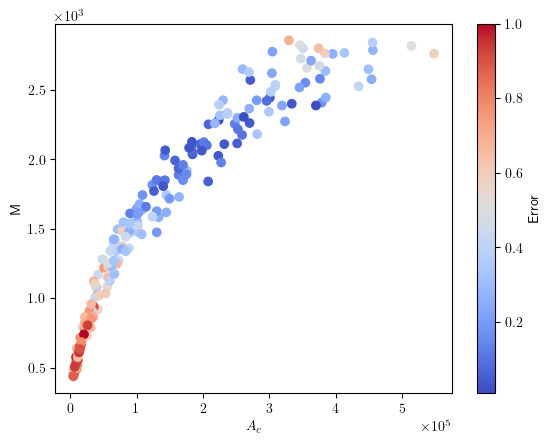

In [377]:
fig = plt.figure()
X_test_heatmap_b = pd.DataFrame(X_test_kb[y_test_class==1])
col1 = np.abs(y_test_kb[y_test_class==0] - y_predict_lr_bound)
col1 = col1/col1.max()
sc = plt.scatter(X_test_heatmap_b.get(4), X_test_heatmap_b.get(5), c=col1, cmap='coolwarm')
xtex = r"$A_c$"
ytext = r"M"
ctex = r"Error"
plt.xlabel(xlabel=xtex)
plt.ylabel(ylabel=ytext)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.colorbar(sc, label=ctex)
plt.savefig('./figures/monte-carlo-sampling-heatmap-bound-error-predictwithoutclass.eps',format='eps',dpi=300)
plt.show()

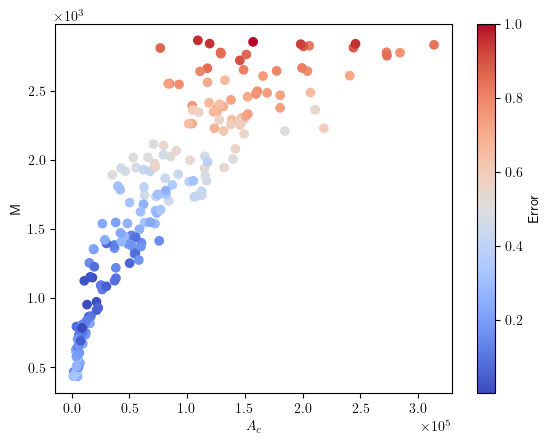

In [378]:
fig = plt.figure()
X_test_heatmap_b = pd.DataFrame(X_test_kb[y_test_class==0])
col1 = np.abs(y_test_kb[y_test_class==1] - y_predict_lr_kernel)
col1 = col1/col1.max()
sc = plt.scatter(X_test_heatmap_b.get(4), X_test_heatmap_b.get(5), c=col1, cmap='coolwarm')
xtex = r"$A_c$"
ytext = r"M"
ctex = r"Error"
plt.xlabel(xlabel=xtex)
plt.ylabel(ylabel=ytext)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.colorbar(sc, label=ctex)
plt.savefig('./figures/monte-carlo-sampling-heatmap-kernel-error-predictwithoutclass.eps',format='eps',dpi=300)
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


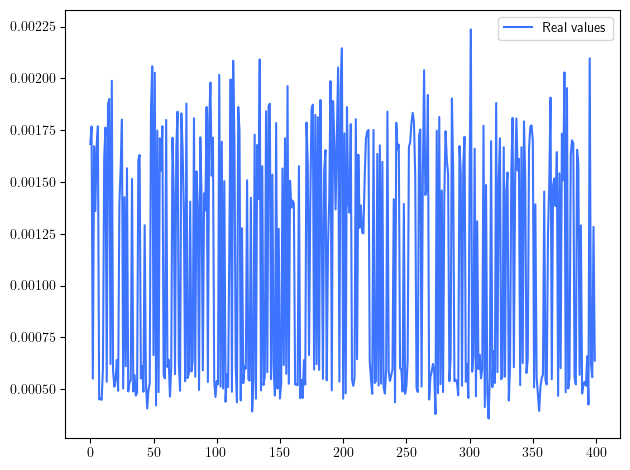

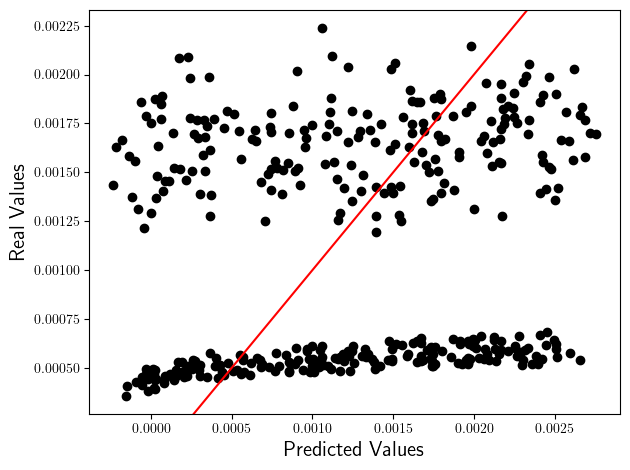

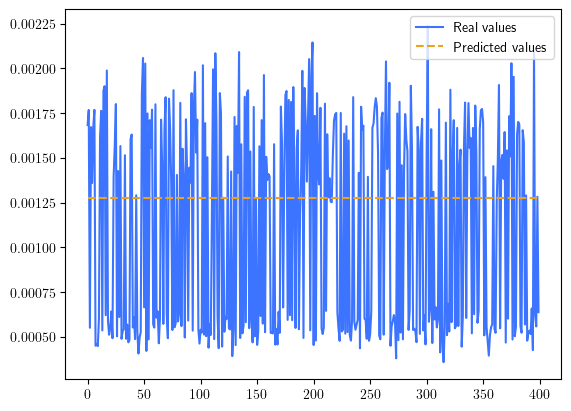

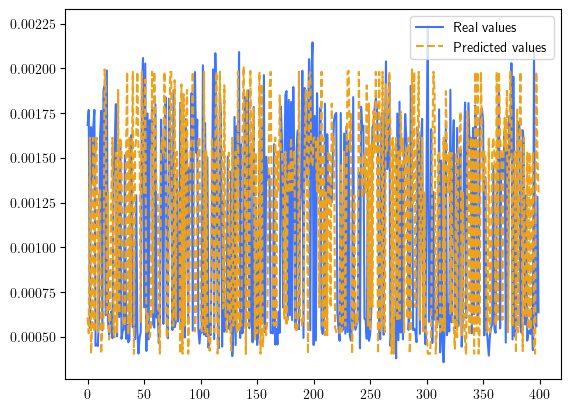

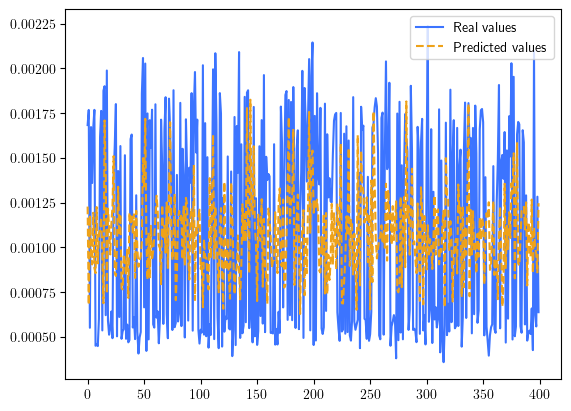

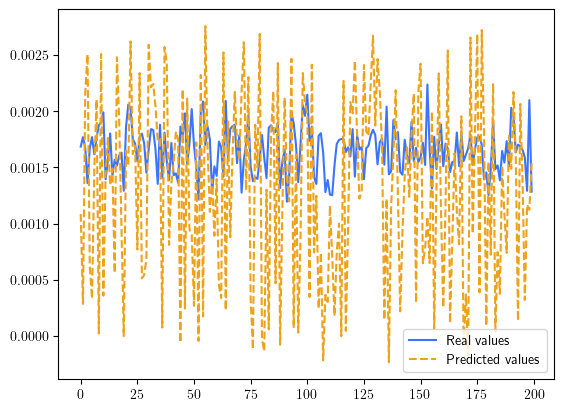

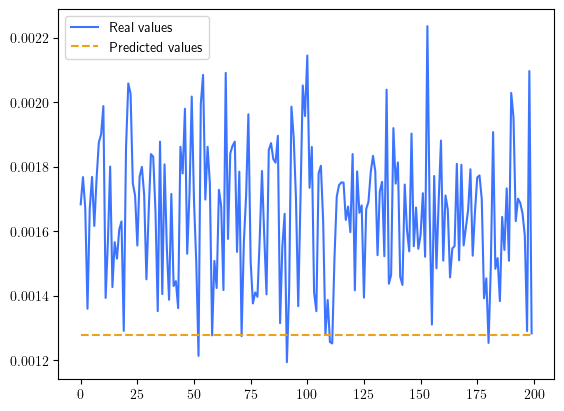

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


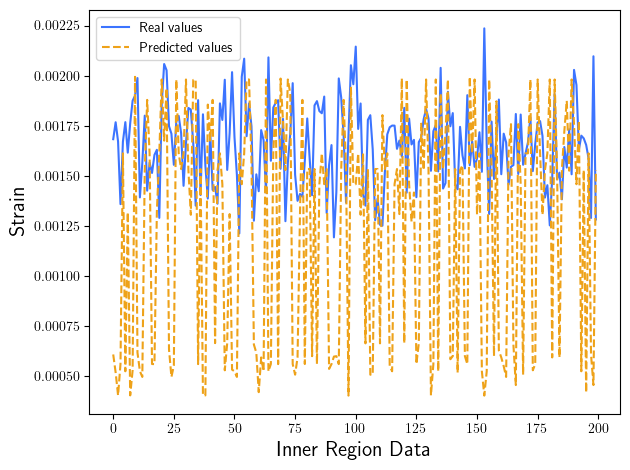

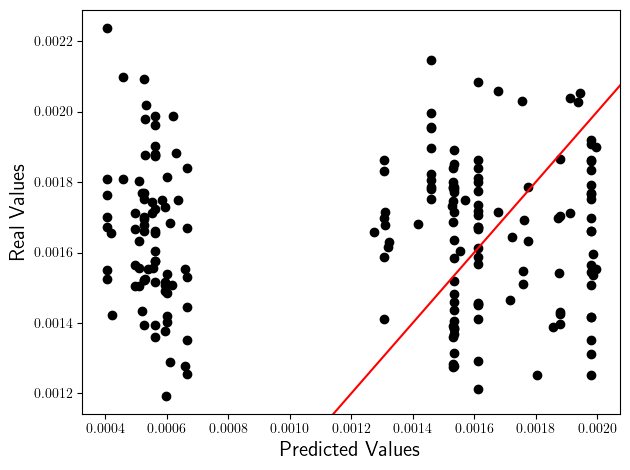

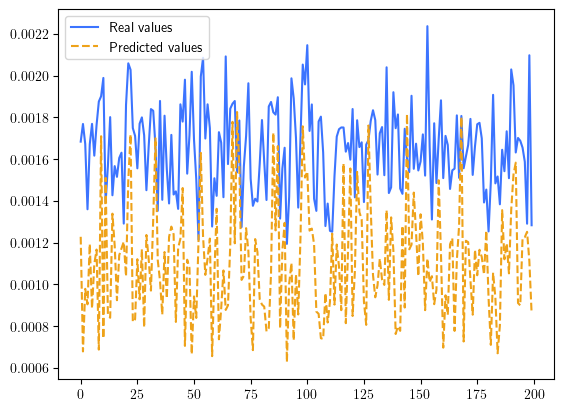

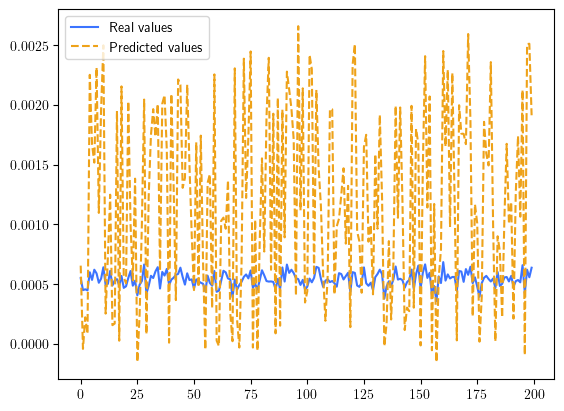

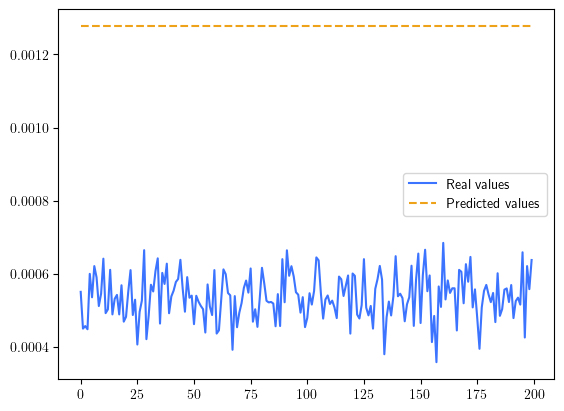

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


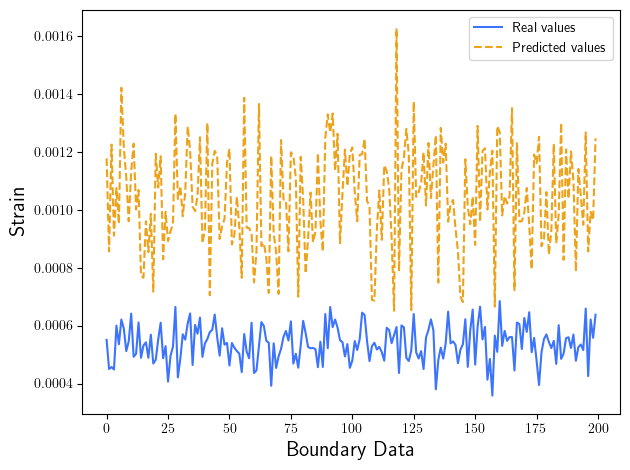

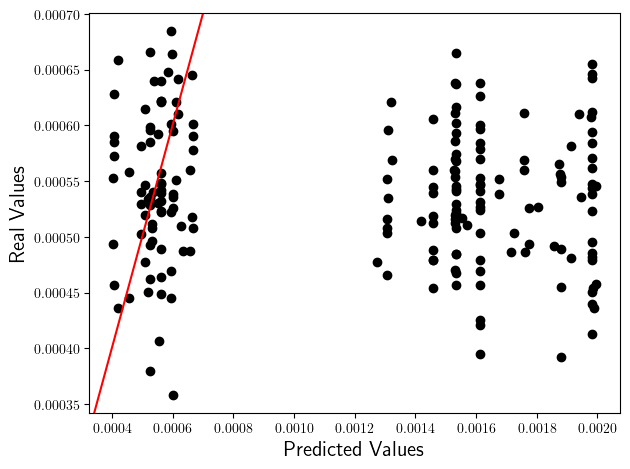

In [379]:
x=np.arange(0,len(y_test_kb),1)

fig1_kb = plt.figure()
plt.plot(x,y_test_kb, '-', color=pretty_blue, label='Real values')
plt.legend()
plt.tight_layout()
plt.savefig('./figures/monte-carlo-sampling-withoutclass-regression.eps',format='eps',dpi=300)
plt.savefig('./figures/monte-carlo-sampling-withoutclass-regression.svg')
plt.show()

fig_true_predict_kb, ax = plt.subplots()
plt.plot(y_predict_lr_kb, y_test_kb, 'ok')
lim_x = ax.get_xlim()
lim_y = ax.get_ylim()
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, '-r')
ax.set_xlim(lim_x)
ax.set_ylim(lim_y)
plt.xlabel('Predicted Values', fontsize=15)
plt.ylabel('Real Values', fontsize=15)
plt.tight_layout()
plt.savefig('./figures/monte-carlo-sampling-withoutclass-regression-true-predict.eps',format='eps',dpi=300)
plt.show()

fig2 = plt.figure()
plt.plot(x,y_test_kb, '-', color=pretty_blue, label='Real values')
plt.plot(x,y_predict_svr_kb, '--', color=nice_orange, label='Predicted values')
plt.legend()
plt.show()

fig3 = plt.figure()
plt.plot(x,y_test_kb, '-', color=pretty_blue, label='Real values')
plt.plot(x,y_predict_dt_kb, '--', color=nice_orange, label='Predicted values')
plt.legend()
plt.show()

fig4 = plt.figure()
plt.plot(x,y_test_kb, '-', color=pretty_blue, label='Real values')
plt.plot(x,y_predict_rf_kb, '--', color=nice_orange, label='Predicted values')
plt.legend()
plt.show()

x2 = np.arange(0,len(y_test_kb[y_test_class==0]),1)

fig1k = plt.figure()
plt.plot(x2,y_test_kb[y_test_class==0], '-', color=pretty_blue, label='Real values')
plt.plot(x2,y_predict_lr_kernel, '--', color=nice_orange, label='Predicted values')
plt.legend()
plt.show()

fig2k = plt.figure()
plt.plot(x2,y_test_kb[y_test_class==0], '-', color=pretty_blue, label='Real values')
plt.plot(x2,y_predict_svr_kernel, '--', color=nice_orange, label='Predicted values')
plt.legend()
plt.show()

fig3k = plt.figure()
plt.plot(x2,y_test_kb[y_test_class==0], '-', color=pretty_blue, label='Real values')
plt.plot(x2,y_predict_dt_kernel, '--', color=nice_orange, label='Predicted values')
plt.xlabel('Inner Region Data', fontsize=15)
plt.ylabel('Strain', fontsize=15)
plt.legend()
plt.tight_layout()
plt.savefig('./figures/monte-carlo-sampling-kernel-withoutclass-regression.eps',format='eps',dpi=300)
plt.savefig('./figures/monte-carlo-sampling-kernel-withoutclass-regression.svg')
plt.show()

fig_true_predict_kb, ax = plt.subplots()
plt.plot(y_predict_dt_kernel, y_test_kb[y_test_class==0], 'ok')
lim_x = ax.get_xlim()
lim_y = ax.get_ylim()
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, '-r')
ax.set_xlim(lim_x)
ax.set_ylim(lim_y)
plt.xlabel('Predicted Values', fontsize=15)
plt.ylabel('Real Values', fontsize=15)
plt.tight_layout()
plt.savefig('./figures/monte-carlo-sampling-kernel-withoutclass-regression-true-predict.eps',format='eps',dpi=300)
plt.show()

fig4k = plt.figure()
plt.plot(x2,y_test_kb[y_test_class==0], '-', color=pretty_blue, label='Real values')
plt.plot(x2,y_predict_rf_kernel, '--', color=nice_orange, label='Predicted values')
plt.legend()
plt.show()

x3 = np.arange(0,len(y_test_kb[y_test_class==1]),1)

fig1b = plt.figure()
plt.plot(x3,y_test_kb[y_test_class==1], '-', color=pretty_blue, label='Real values')
plt.plot(x3,y_predict_lr_bound, '--', color=nice_orange, label='Predicted values')
plt.legend()
plt.show()

fig2b = plt.figure()
plt.plot(x3,y_test_kb[y_test_class==1], '-', color=pretty_blue, label='Real values')
plt.plot(x3,y_predict_svr_bound, '--', color=nice_orange, label='Predicted values')
plt.legend()
plt.show()

fig4b = plt.figure()
plt.plot(x3,y_test_kb[y_test_class==1], '-', color=pretty_blue, label='Real values')
plt.plot(x3,y_predict_rf_bound, '--', color=nice_orange, label='Predicted values')
plt.xlabel('Boundary Data', fontsize=15)
plt.ylabel('Strain', fontsize=15)
plt.legend()
plt.tight_layout()
plt.savefig('./figures/monte-carlo-sampling-bound-withoutclass-regression.eps',format='eps',dpi=300)
plt.savefig('./figures/monte-carlo-sampling-bound-withoutclass-regression.svg')
plt.show()

fig_true_predict_kb, ax = plt.subplots()
plt.plot(y_predict_dt_kernel, y_test_kb[y_test_class==1], 'ok')
lim_x = ax.get_xlim()
lim_y = ax.get_ylim()
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, '-r')
ax.set_xlim(lim_x)
ax.set_ylim(lim_y)
plt.xlabel('Predicted Values', fontsize=15)
plt.ylabel('Real Values', fontsize=15)
plt.tight_layout()
plt.savefig('./figures/monte-carlo-sampling-bound-withoutclass-regression-true-predict.eps',format='eps',dpi=300)
plt.show()